In [565]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## 2.1.	Read the data as an appropriate Time Series data and plot the data.

In [566]:
#It is recommended that we make our time series reference as the index
df = pd.read_csv("Sparkling.csv")

In [567]:
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

#### Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [568]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [569]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [570]:
df = df.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [571]:
df.shape

(187, 1)

In [572]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [573]:
df.isna().sum()

Sparkling    0
dtype: int64

### Plotting the Time Series to understand the behaviour of the data.

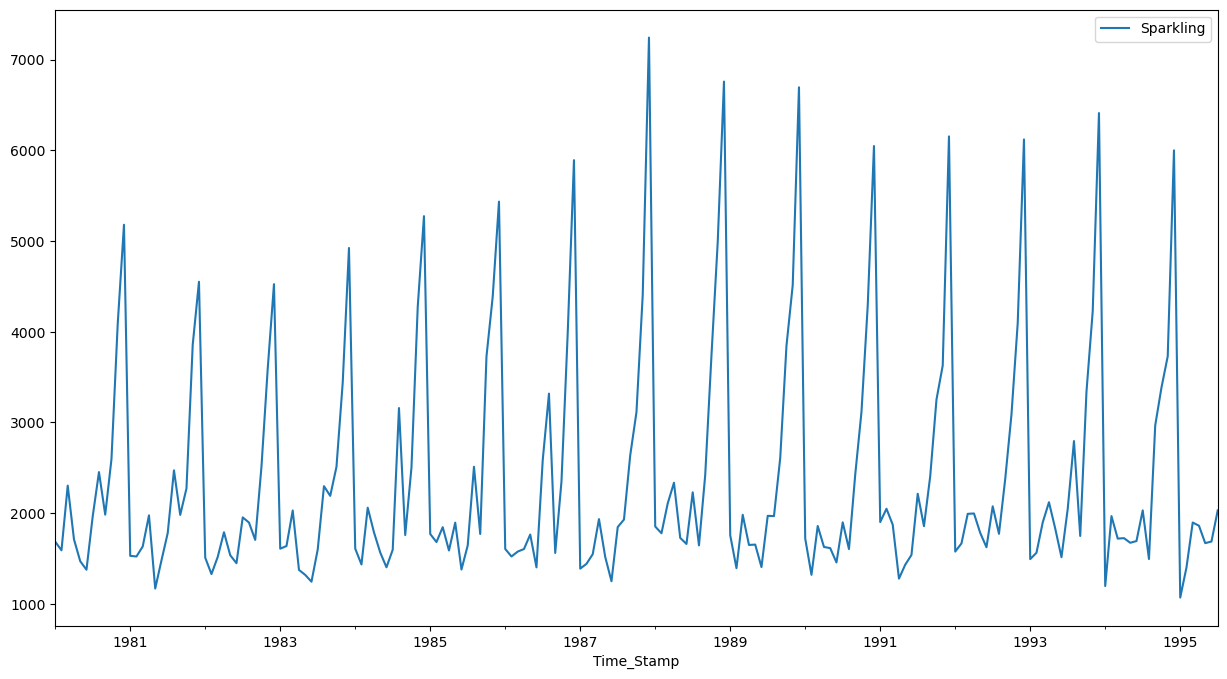

In [574]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
df.plot()
plt.show()

## 2.2.	Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [575]:
round(df.describe(),3)

Sparkling
count    187.000
mean    2402.417
std     1295.112
min     1070.000
25%     1605.000
50%     1874.000
75%     2549.000
max     7242.000

#### Boxplot to understand the spread of sales across different years and within different months across years.

#### Yearly Boxplot

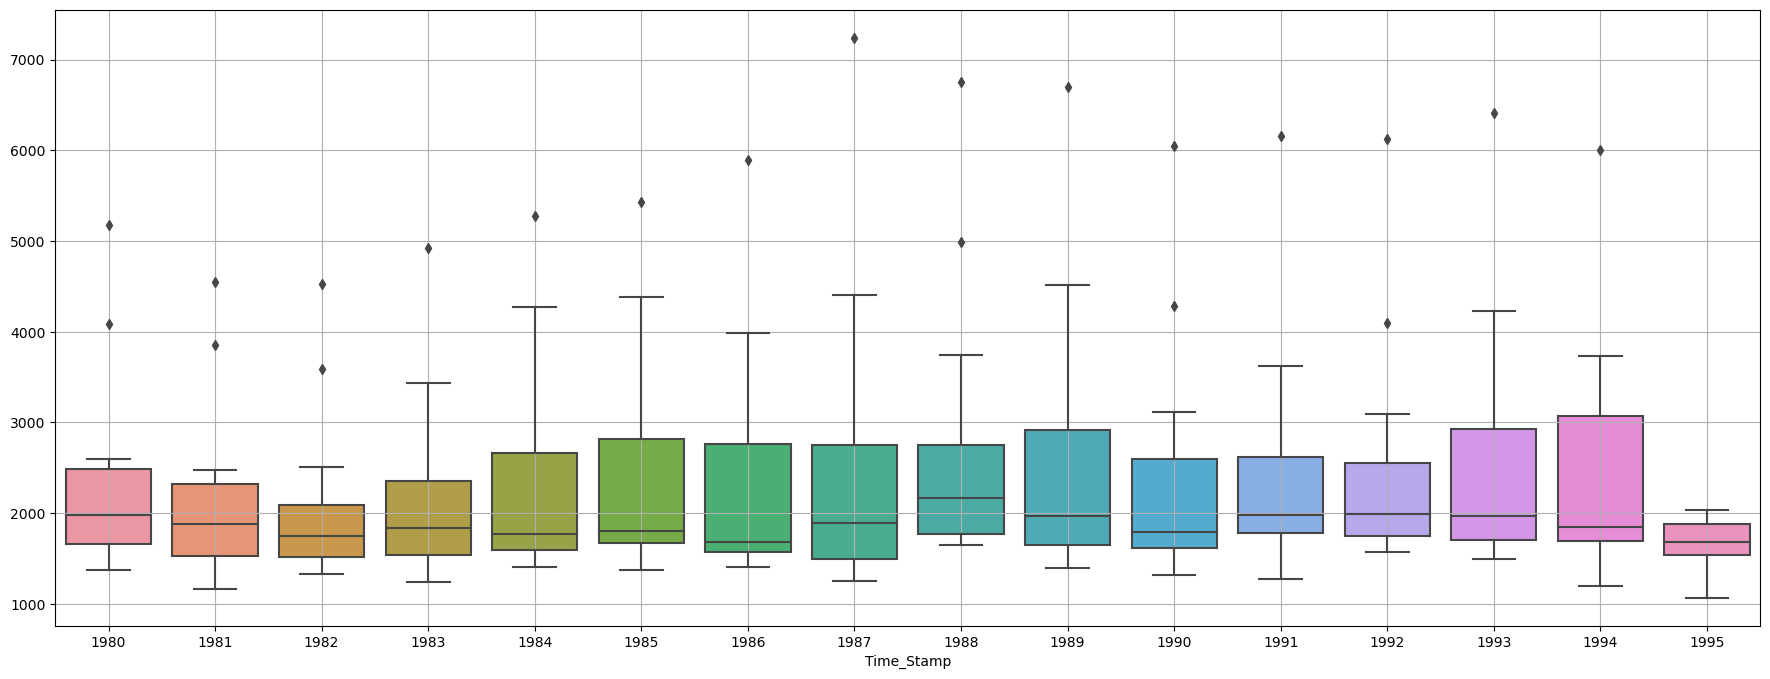

In [576]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

#### Monthly Boxplot

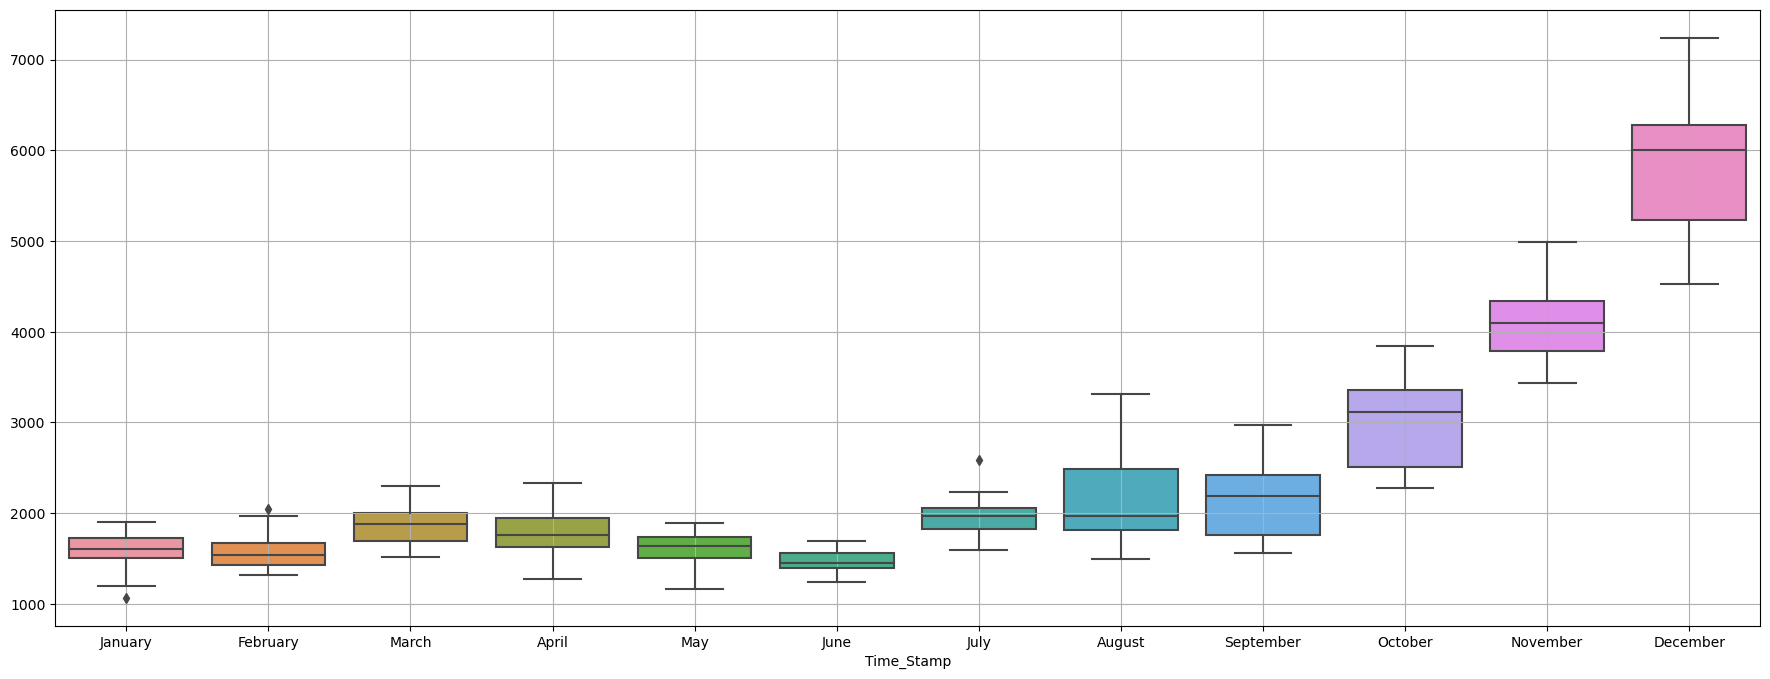

In [577]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

#### Time series monthplot to understand the spread across different years and within different months across years.

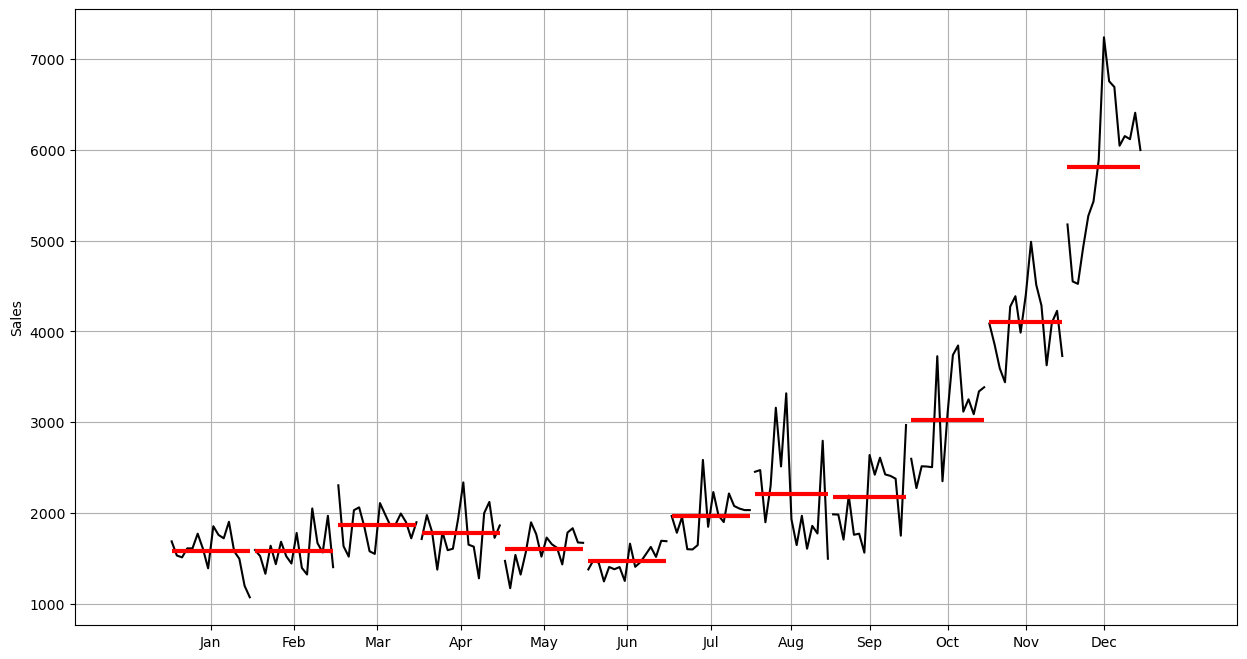

In [578]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Sparkling'],ylabel='Sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('Sparkling' in this case) across various months. The red line is the median value.

#### Plot of monthly sales across years.

In [579]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp   April  August  December  February  January    July    June  \
Time_Stamp                                                                
1980        1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981        1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982        1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983        1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984        1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985        1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986        1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987        1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988        2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989        1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990        1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991        1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992        1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993        2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994        1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995        1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

Time_Stamp   March     May  November  October  September  
Time_Stamp                                                
1980        2304.0  1471.0    4087.0   2596.0     1984.0  
1981        1633.0  1170.0    3857.0   2273.0     1981.0  
1982        1518.0  1537.0    3593.0   2514.0     1706.0  
1983        2030.0  1320.0    3440.0   2511.0     2191.0  
1984        2061.0  1567.0    4273.0   2504.0     1759.0  
1985        1846.0  1896.0    4388.0   3727.0     1771.0  
1986        1577.0  1765.0    3987.0   2349.0     1562.0  
1987        1548.0  1518.0    4405.0   3114.0     2638.0  
1988        2108.0  1728.0    4988.0   3740.0     2421.0  
1989        1982.0  1654.0    4514.0   3845.0     2608.0  
1990        1859.0  1615.0    4286.0   3116.0     2424.0  
1991        1874.0  1432.0    3627.0   3252.0     2408.0  
1992        1993.0  1783.0    4096.0   3088.0     2377.0  
1993        1898.0  1831.0    4227.0   3339.0     1749.0  
1994        1720.0  1674.0    3729.0   3385.0     2968.0  
1995        1897.0  1670.0       NaN      NaN        NaN

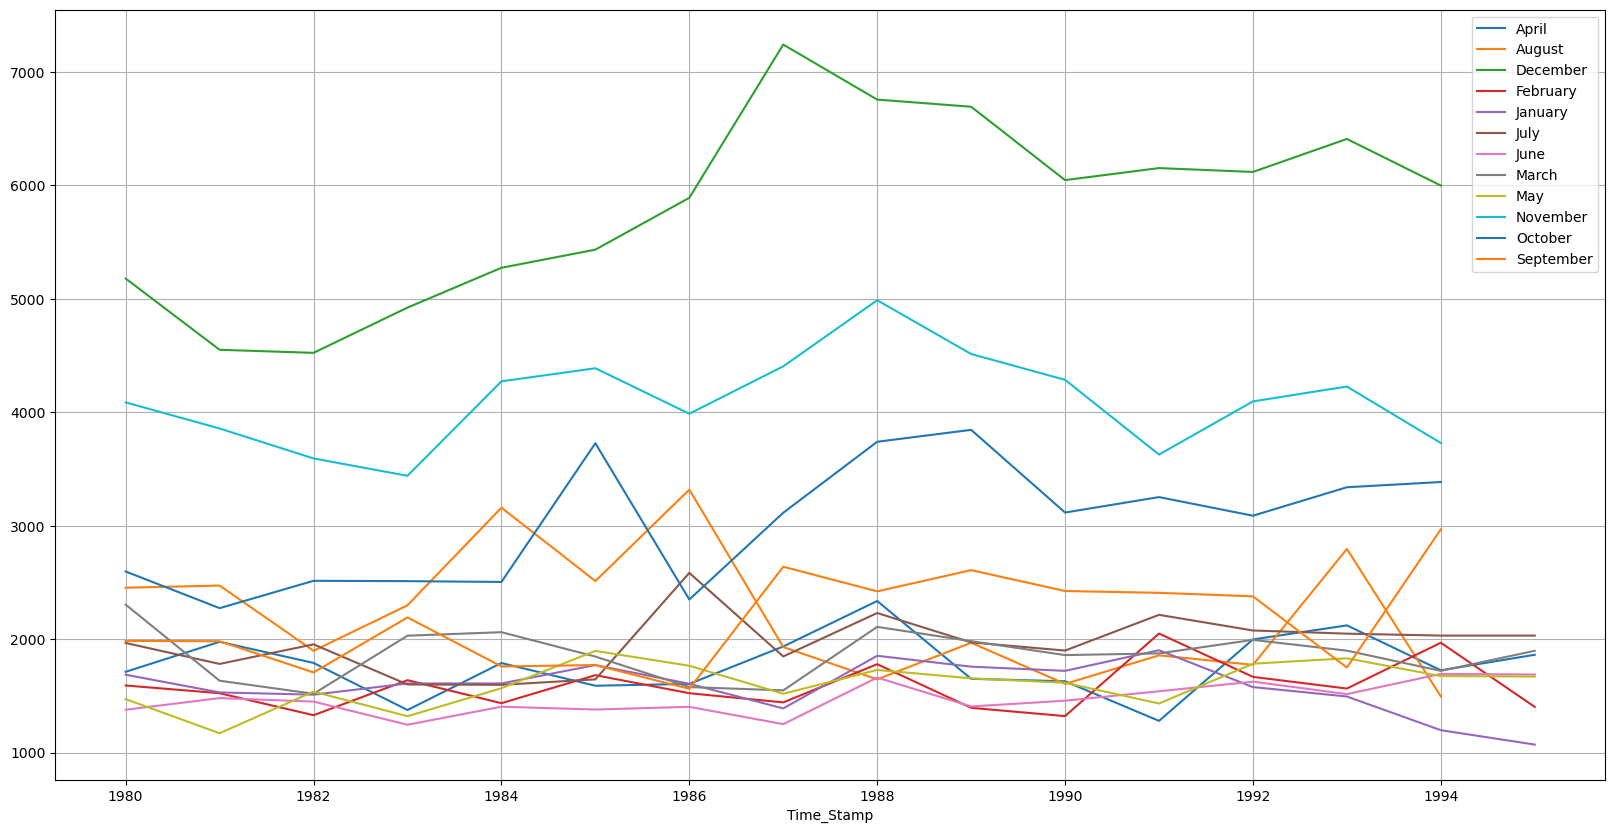

In [580]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

#### Empirical Cumulative Distribution

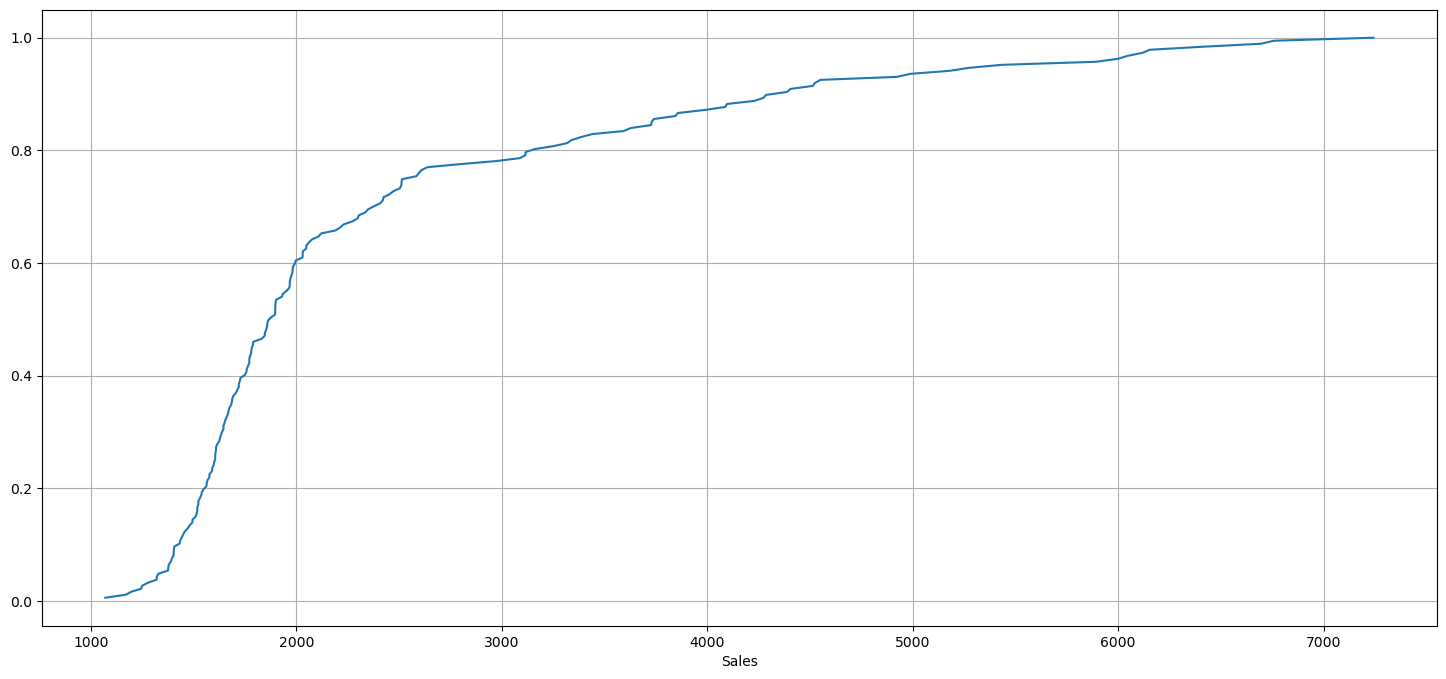

In [581]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sparkling Sales.

#### Average Sparkling Sales per month and the month on month percentage change of Sales.

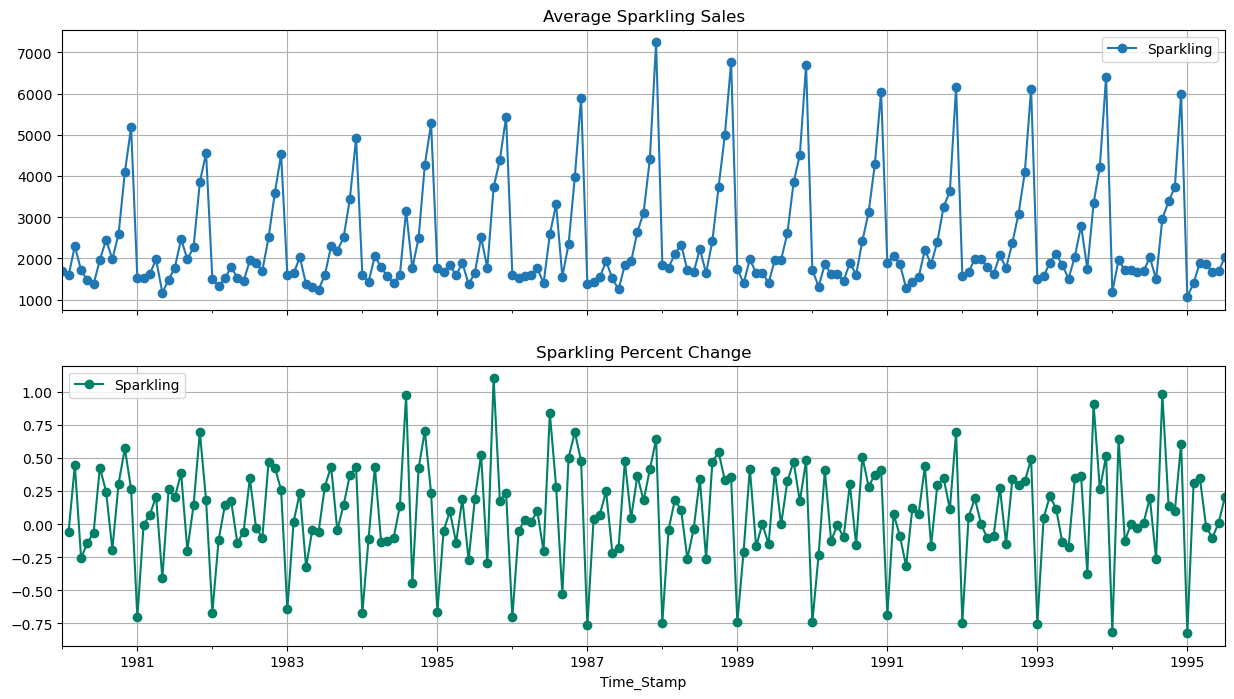

In [582]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Percent Change",grid=True)

The above two graphs tells us the Average 'Sparkling Sales' and the Percentage change of 'Sparkling Sales' with respect to the time.

### Reading this monthly data into a quarterly and yearly format. 

#### Yearly Plot

Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

In [583]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()


Sparkling
Time_Stamp           
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

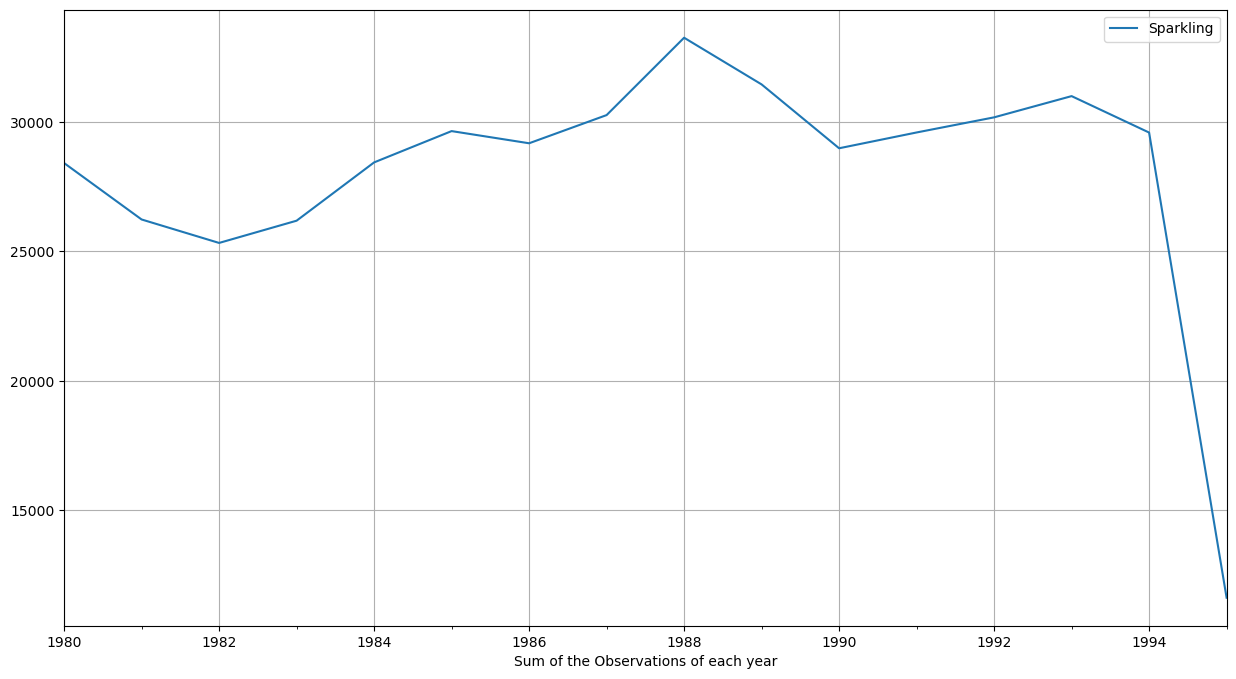

In [584]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

In [585]:
df_yearly_mean = df.resample('Y').mean().round(2)
df_yearly_mean.head()

Sparkling
Time_Stamp           
1980-12-31    2367.17
1981-12-31    2185.58
1982-12-31    2110.08
1983-12-31    2181.67
1984-12-31    2369.25

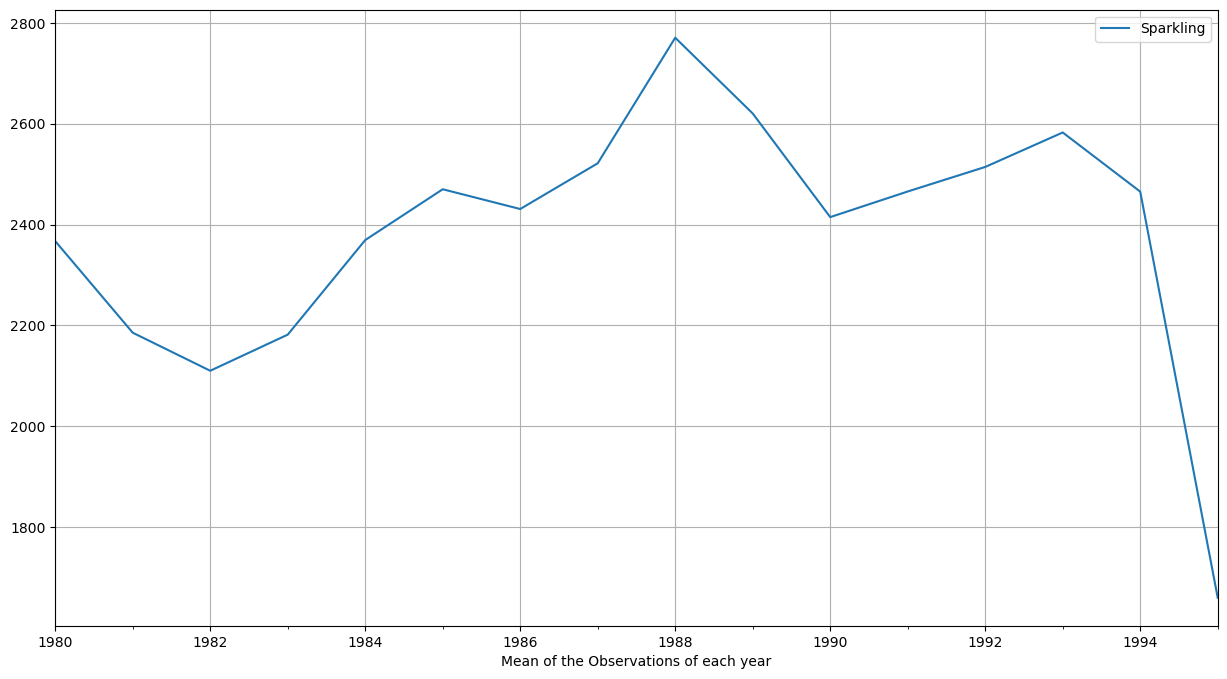

In [586]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

#### Quarterly Plot

In [587]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()

Sparkling
Time_Stamp           
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

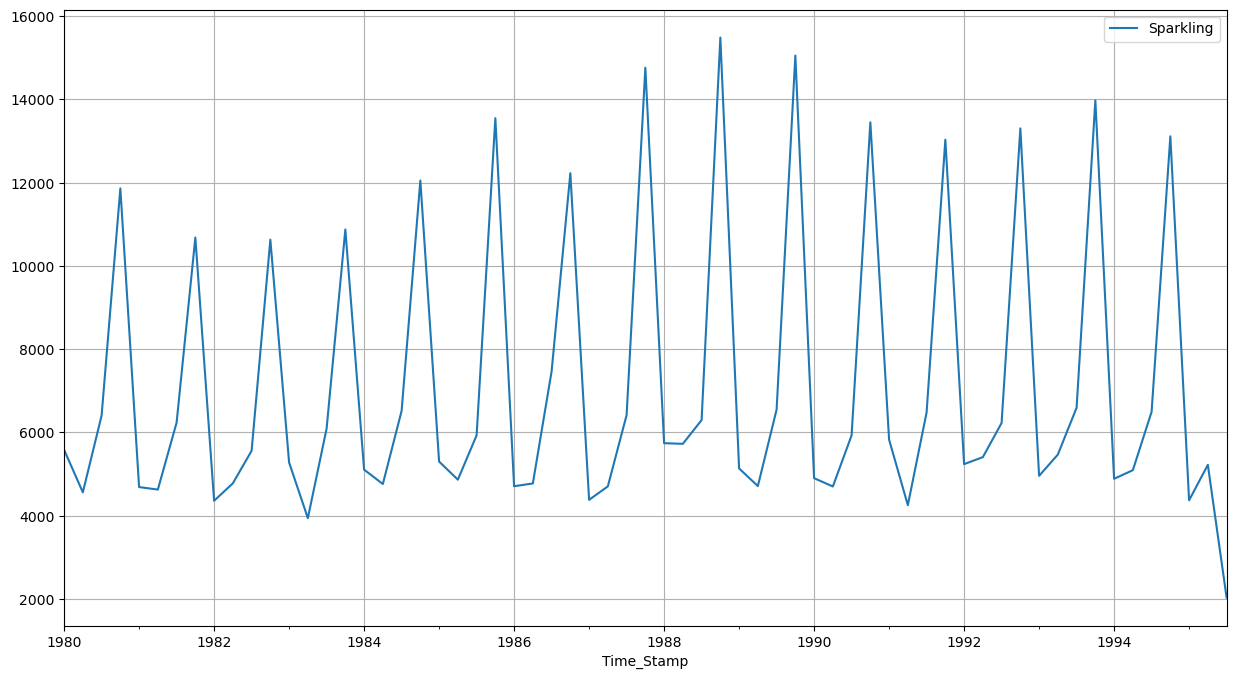

In [588]:
df_quarterly_sum.plot();
plt.grid()

In [589]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

Sparkling
Time_Stamp             
1980-03-31  1860.333333
1980-06-30  1520.000000
1980-09-30  2134.333333
1980-12-31  3954.000000
1981-03-31  1562.000000

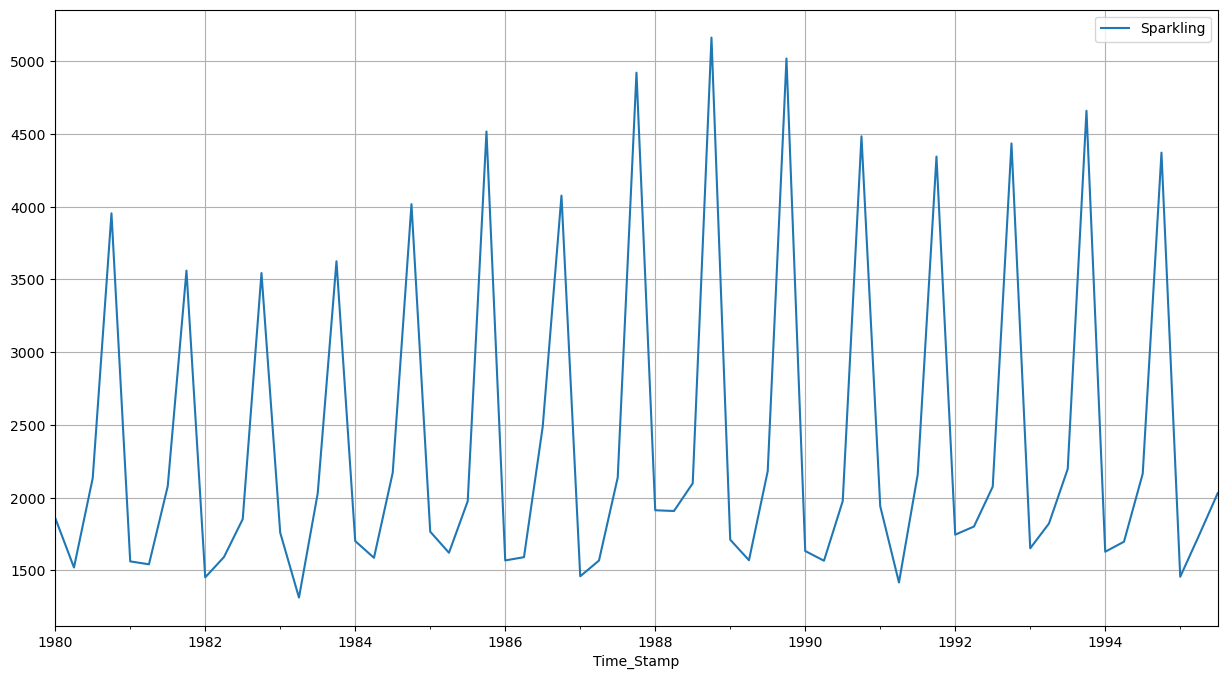

In [590]:
df_quarterly_mean.plot();
plt.grid()

### Decompose the Time Series

#### Additive Model

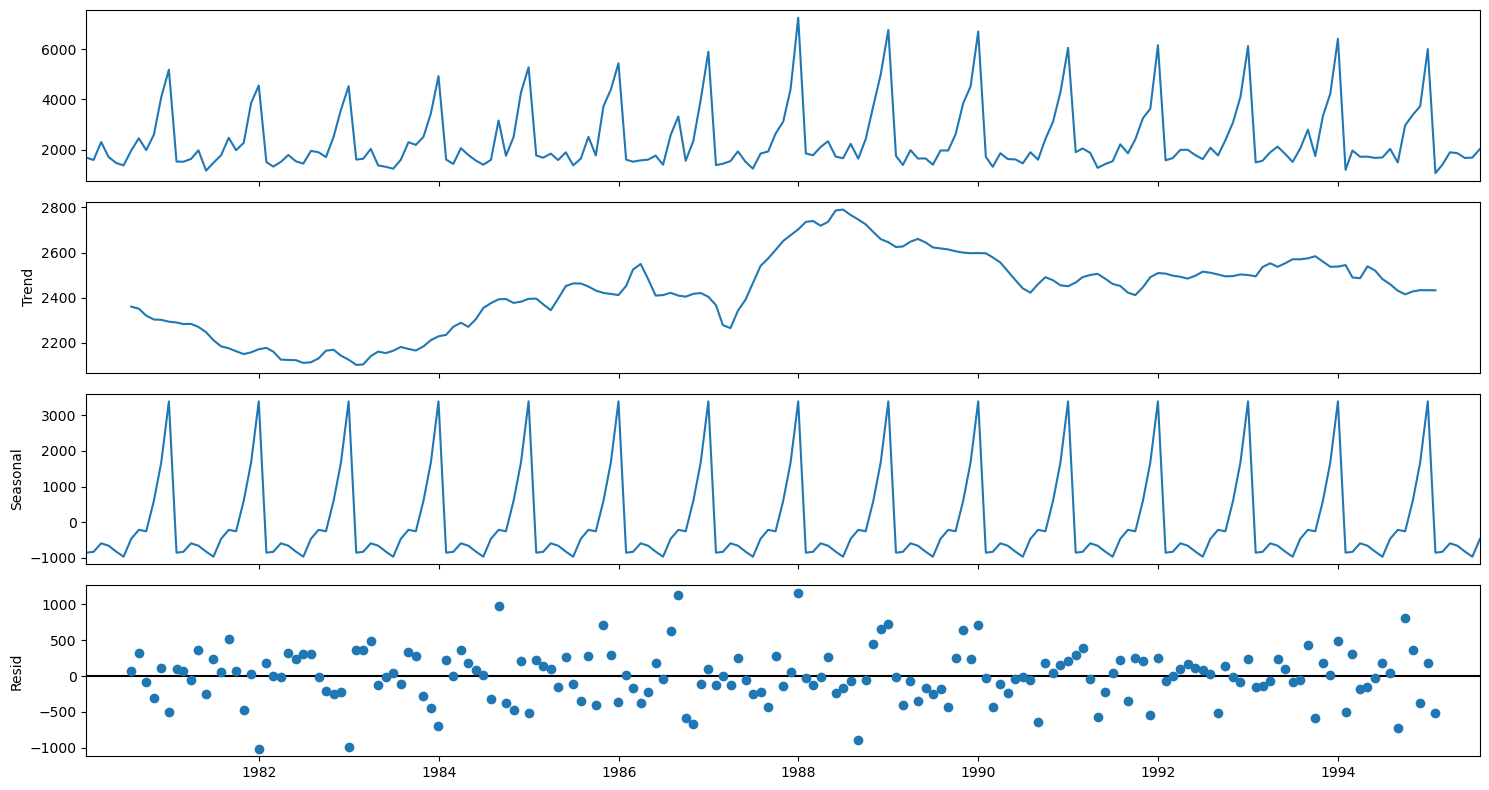

In [591]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

In [592]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [593]:
print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 Time_Stamp
1980-01-31        NaN
1980-02-29        NaN
1980-03-31        NaN
1980-04-30        NaN
1980-05-31        NaN
1980-06-30        NaN
1980-07-31    2360.67
1980-08-31    2351.33
1980-09-30    2320.54
1980-10-31    2303.58
1980-11-30    2302.04
1980-12-31    2293.79
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.26
1980-02-29    -830.35
1980-03-31    -592.36
1980-04-30    -658.49
1980-05-31    -824.42
1980-06-30    -967.43
1980-07-31    -465.50
1980-08-31    -214.33
1980-09-30    -254.68
1980-10-31     599.77
1980-11-30    1675.07
1980-12-31    3386.98
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31       NaN
1980-02-29       NaN
1980-03-31       NaN
1980-04-30       NaN
1980-05-31       NaN
1980-06-30       NaN
1980-07-31     70.84
1980-08-31    316.00
1980-09-30    -81.86
1980-10-31   -307.35
1980-11-30    109.89
1980-12-31   -501.78
Name: resid, dtype: float64 



<Axes: xlabel='Time_Stamp'>

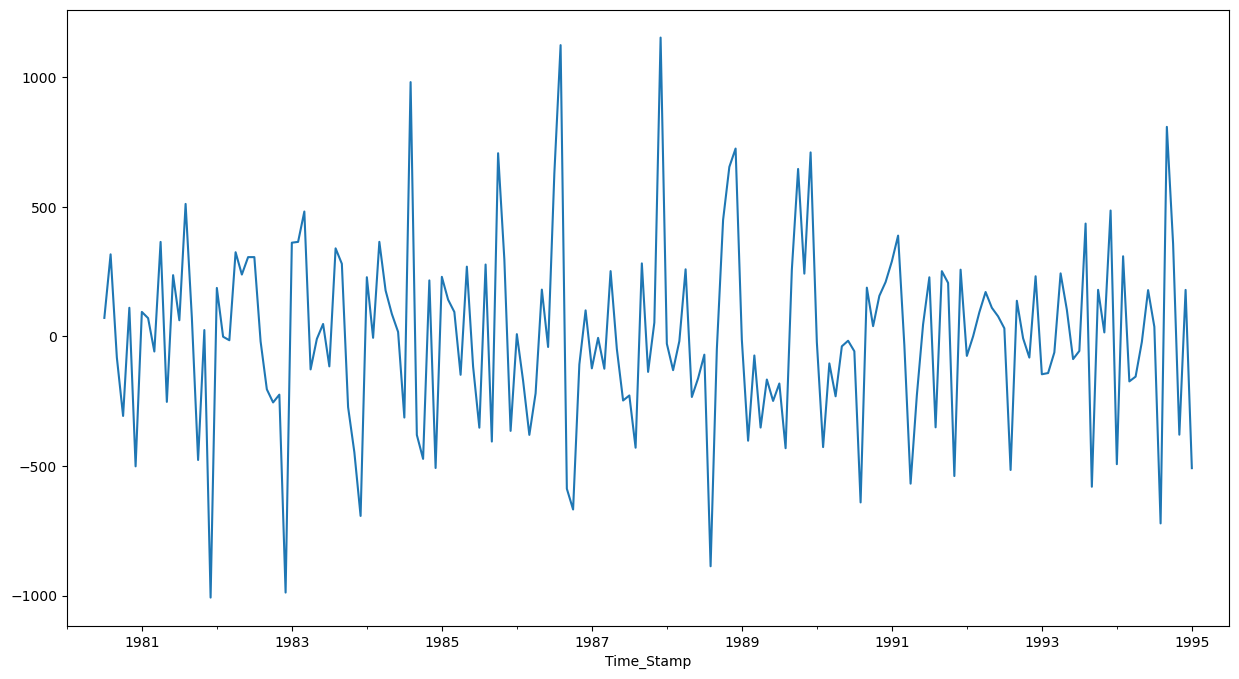

In [594]:
residual.plot()

#### Multiplicative Model

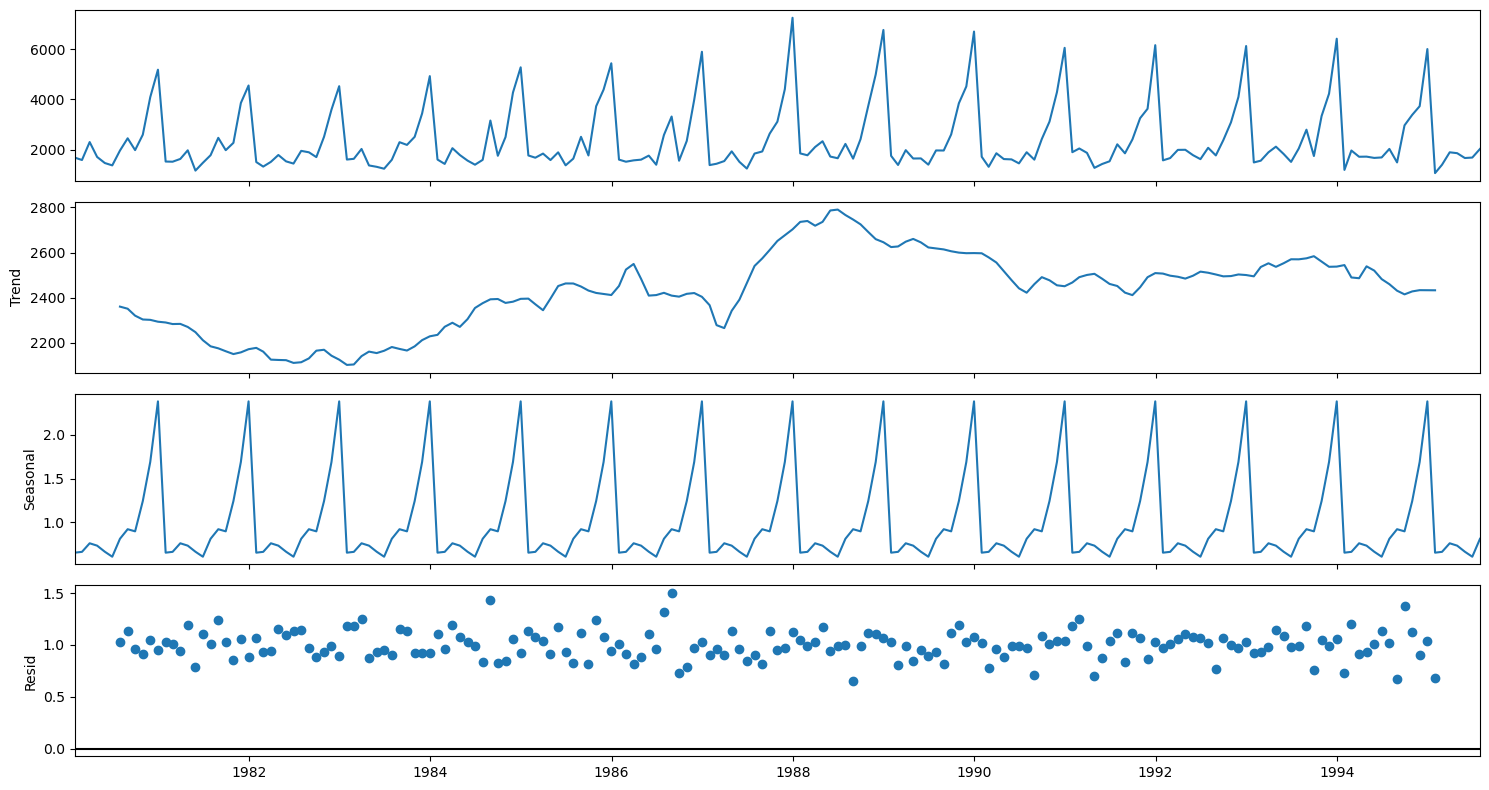

In [595]:
##Decompose the time series multiplicatively
decomposition_mul = seasonal_decompose(df,model='multiplicative')
decomposition_mul.plot();

In [596]:
trend_mul = decomposition_mul.trend
seasonality_mul = decomposition_mul.seasonal
residual_mul = decomposition_mul.resid

In [597]:
print('Trend','\n',trend_mul.round(2).head(12),'\n')
print('Seasonality','\n',seasonality_mul.round(2).head(12),'\n')
print('Residual','\n',residual_mul.round(2).head(12),'\n')

Trend 
 Time_Stamp
1980-01-31        NaN
1980-02-29        NaN
1980-03-31        NaN
1980-04-30        NaN
1980-05-31        NaN
1980-06-30        NaN
1980-07-31    2360.67
1980-08-31    2351.33
1980-09-30    2320.54
1980-10-31    2303.58
1980-11-30    2302.04
1980-12-31    2293.79
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.65
1980-02-29    0.66
1980-03-31    0.76
1980-04-30    0.73
1980-05-31    0.66
1980-06-30    0.60
1980-07-31    0.81
1980-08-31    0.92
1980-09-30    0.89
1980-10-31    1.24
1980-11-30    1.69
1980-12-31    2.38
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31     NaN
1980-02-29     NaN
1980-03-31     NaN
1980-04-30     NaN
1980-05-31     NaN
1980-06-30     NaN
1980-07-31    1.03
1980-08-31    1.14
1980-09-30    0.96
1980-10-31    0.91
1980-11-30    1.05
1980-12-31    0.95
Name: resid, dtype: float64 



<Axes: xlabel='Time_Stamp'>

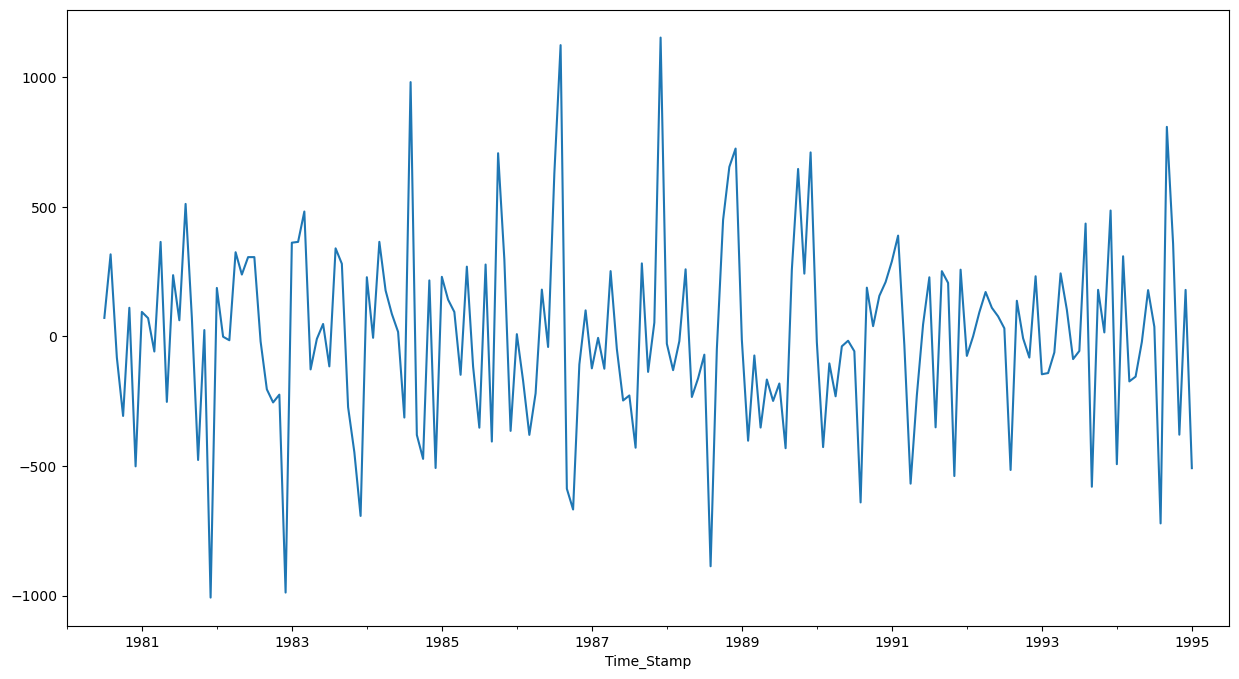

In [598]:
residual.plot()

## 2.3.	Split the data into training and test. The test data should start in 1991.

In [599]:
train = df[df.index < '1991']
test = df[df.index >= '1991']

In [600]:
# Printing the Data
print('Training Data')
display(train)

Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471
...               ...
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

[132 rows x 1 columns]

In [601]:
# Printing the Data
print('Head of Test Data')
display(test.head())
print('Tail of Test Data')
display(test.tail())

Head of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Tail of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [602]:
print('Train dataset shape:', train.shape)
print('Test dataset shape:',test.shape)

Train dataset shape: (132, 1)
Test dataset shape: (55, 1)


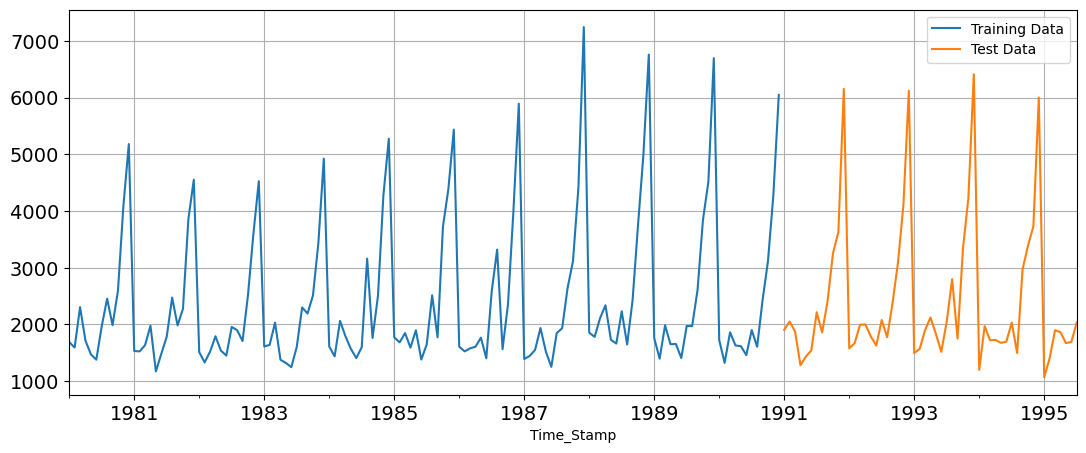

In [603]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## 2.4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Linear Regression

In [604]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [605]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [606]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



Now that our training and test data has been modified, let us go ahead use Linear Regression to build the model on the training data and test the model on the test data.

In [607]:
from sklearn.linear_model import LinearRegression

In [608]:
lr = LinearRegression()

In [609]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

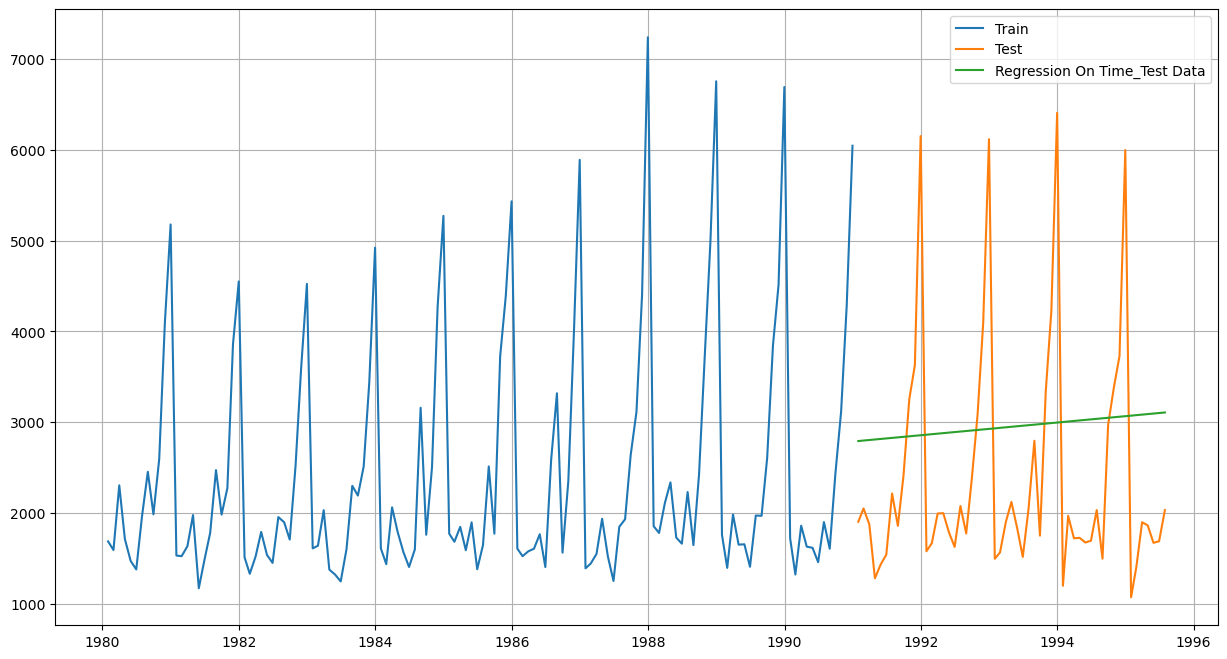

In [610]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

#### Defining the accuracy metrics

In [611]:
from sklearn import metrics

#### Model Evaluation

In [612]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.14


In [613]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  1389.135175

### Model 2: Naive Approach: 

In [614]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [615]:
train.tail()

Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

In [616]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

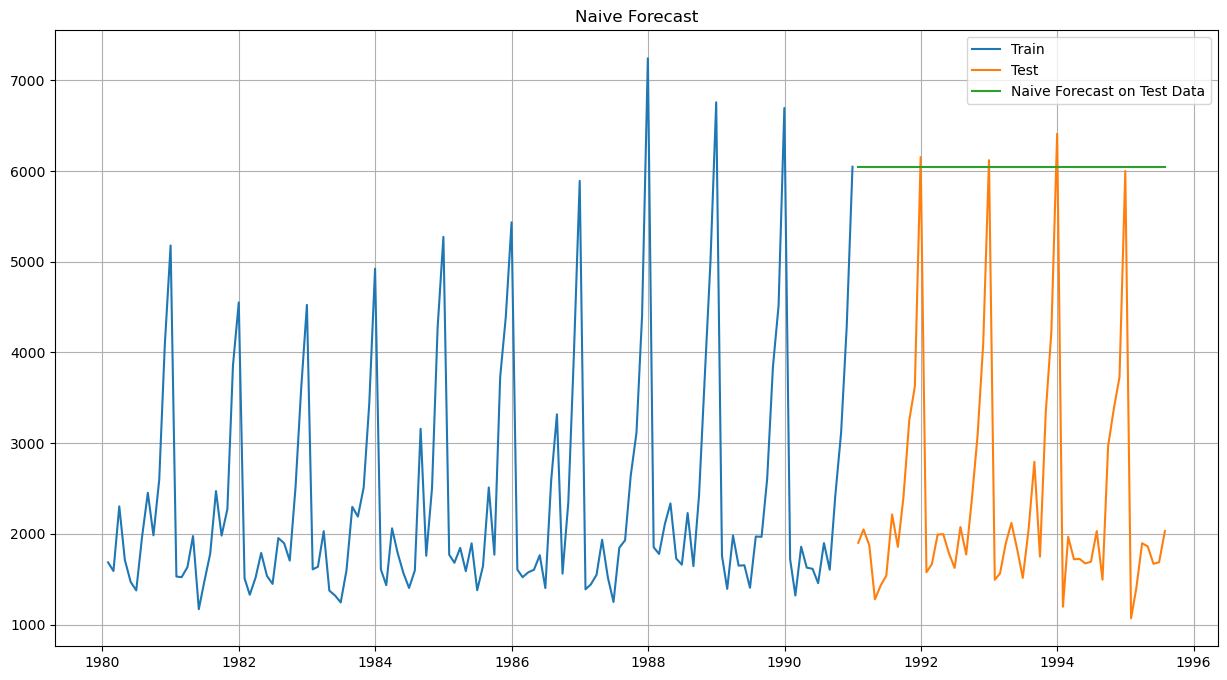

In [617]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation

In [618]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [619]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352

### Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [620]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [621]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

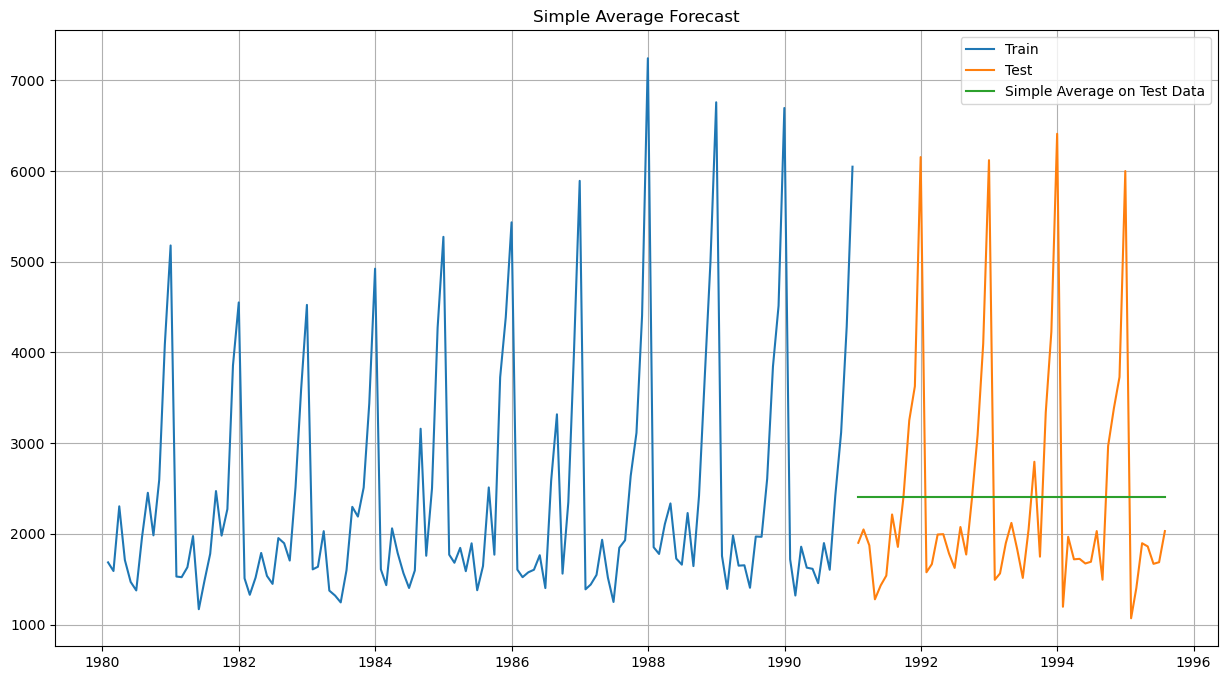

In [622]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [623]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [624]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    1389.135175
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

## Method 4: Moving Average(MA)

In [625]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

#### Trailing moving averages

In [626]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

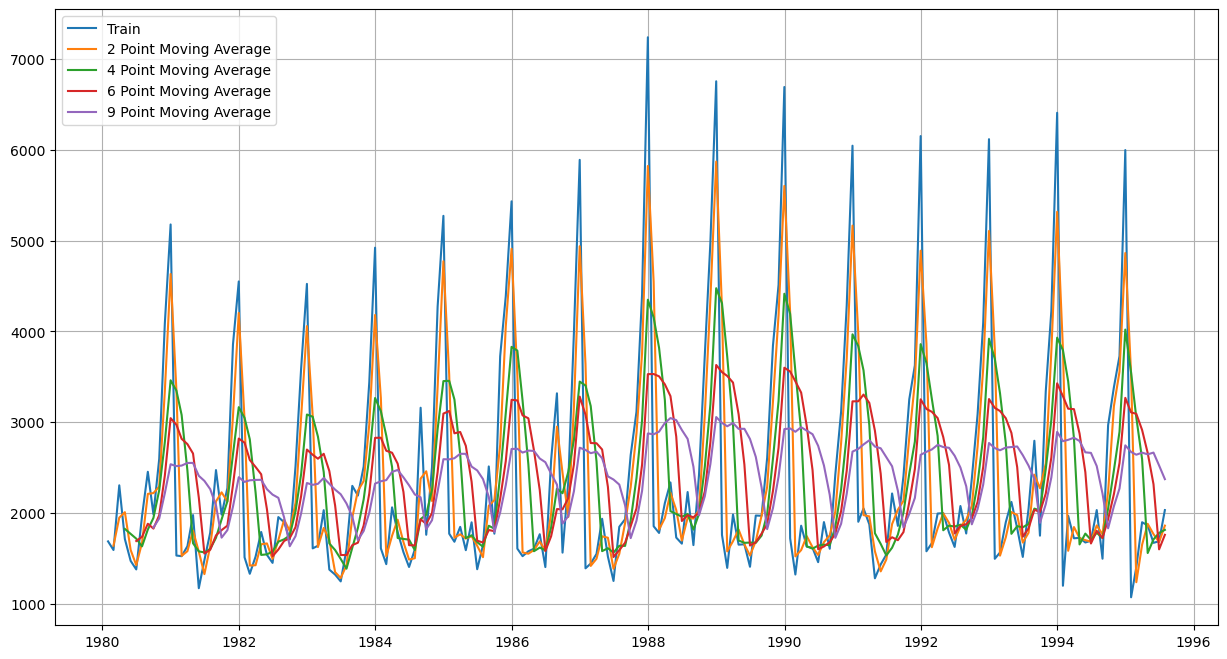

In [627]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [628]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991']

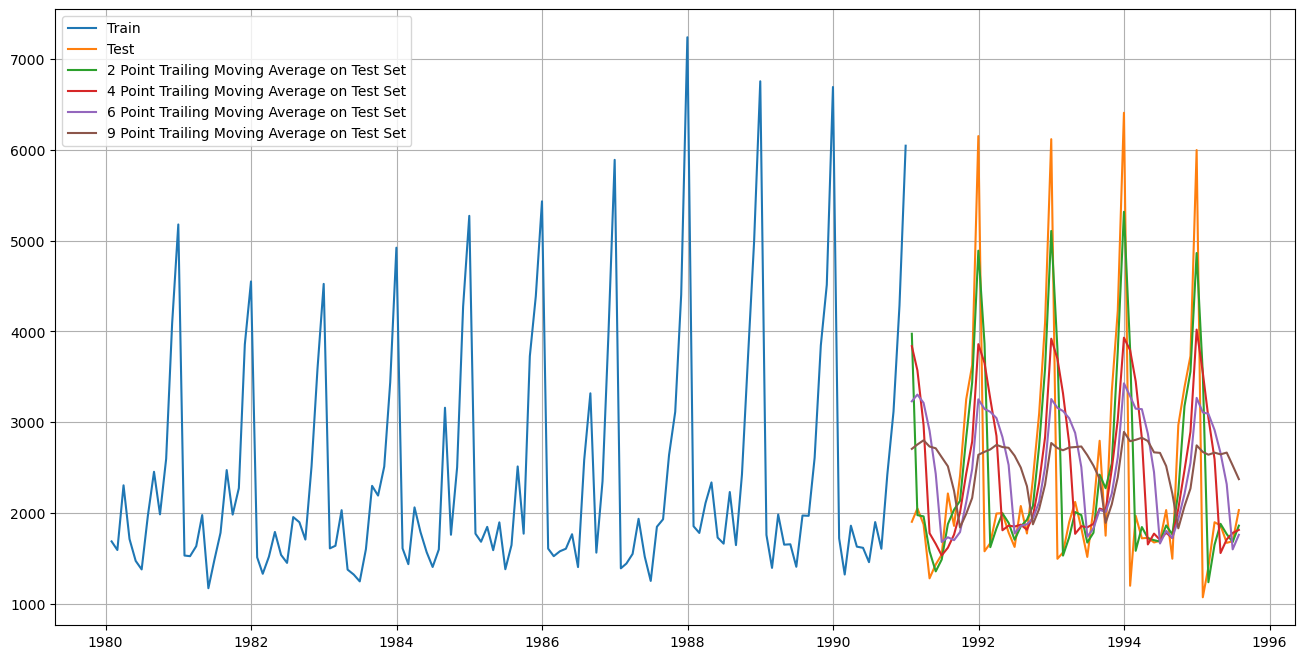

In [629]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation

In [630]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [631]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

### Consolidated plots of All Models

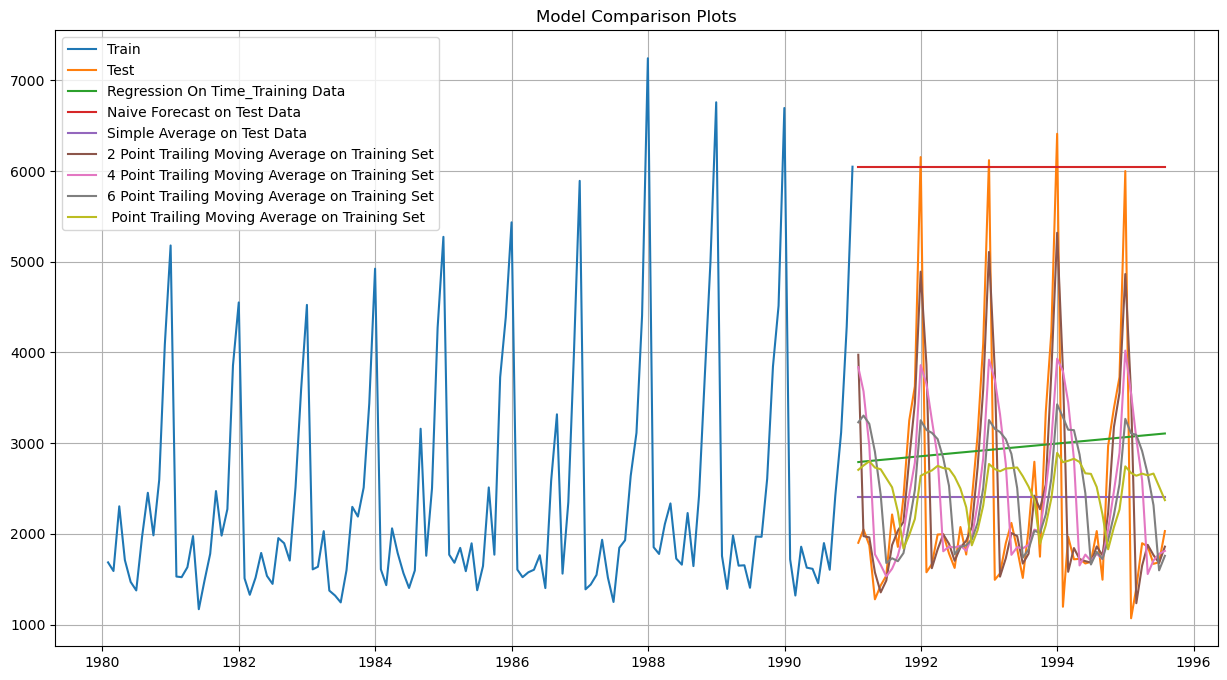

In [632]:
## Plotting on both Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'], label='6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'], label=' Point Trailing Moving Average on Training Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Method 5: Exponential Smoothing methods


#### 5.1 SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors


In [633]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [634]:
SES_train = train.copy()
SES_test = test.copy()

In [635]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\prapthi.pandian\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [636]:
model_SES_autofit = model_SES.fit(optimized=True)

In [637]:
model_SES_autofit.params

{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [638]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  2676.676366
1991-02-28       2049  2676.676366
1991-03-31       1874  2676.676366
1991-04-30       1279  2676.676366
1991-05-31       1432  2676.676366

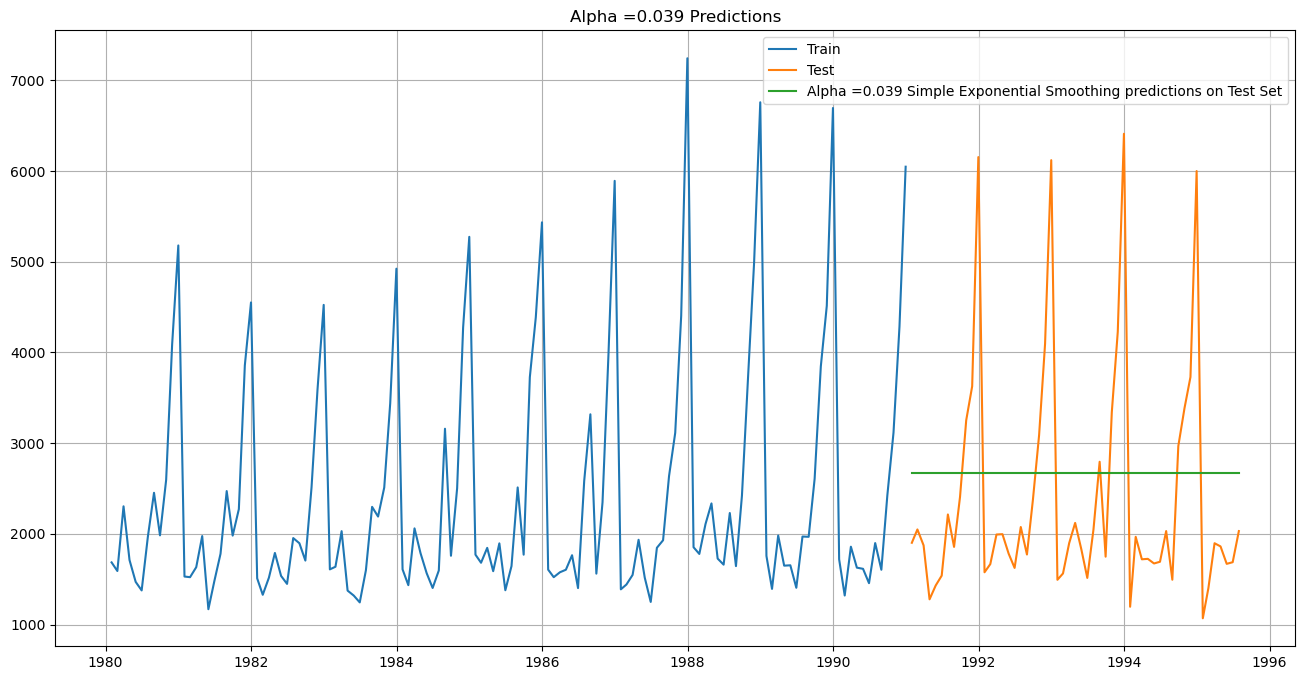

In [639]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.039 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.039 Predictions');

#### Model Evaluation for $\alpha$ = 0.039 : Simple Exponential Smoothing

In [640]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.039, Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.039, Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1304.927


In [641]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.039,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                        1389.135175
NaiveModel                              3864.279352
SimpleAverageModel                      1275.081804
2pointTrailingMovingAverage              813.400684
4pointTrailingMovingAverage             1156.589694
6pointTrailingMovingAverage             1283.927428
9pointTrailingMovingAverage             1346.278315
Alpha=0.039,SimpleExponentialSmoothing  1304.927405

#### 5.2 Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [642]:
DES_train = train.copy()
DES_test = test.copy()

In [643]:
model_DES = Holt(DES_train['Sparkling'])
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters:')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters:

{'smoothing_level': 0.6885714285714285, 'smoothing_trend': 9.999999999999999e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1686.0, 'initial_trend': -95.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\prapthi.pandian\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\prapthi.pandian\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [644]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-31    5221.278699
1991-02-28    5127.886554
1991-03-31    5034.494409
1991-04-30    4941.102264
1991-05-31    4847.710119
1991-06-30    4754.317974
1991-07-31    4660.925829
1991-08-31    4567.533684
1991-09-30    4474.141539
1991-10-31    4380.749394
1991-11-30    4287.357249
1991-12-31    4193.965104
1992-01-31    4100.572959
1992-02-29    4007.180813
1992-03-31    3913.788668
1992-04-30    3820.396523
1992-05-31    3727.004378
1992-06-30    3633.612233
1992-07-31    3540.220088
1992-08-31    3446.827943
1992-09-30    3353.435798
1992-10-31    3260.043653
1992-11-30    3166.651508
1992-12-31    3073.259363
1993-01-31    2979.867218
1993-02-28    2886.475073
1993-03-31    2793.082928
1993-04-30    2699.690783
1993-05-31    2606.298638
1993-06-30    2512.906493
1993-07-31    2419.514348
1993-08-31    2326.122203
1993-09-30    2232.730058
1993-10-31    2139.337913
1993-11-30    2045.945768
1993-12-31    1952.553623
1994-01-31    1859.161478
1994-02-28    1765.769333
1994-03-31  

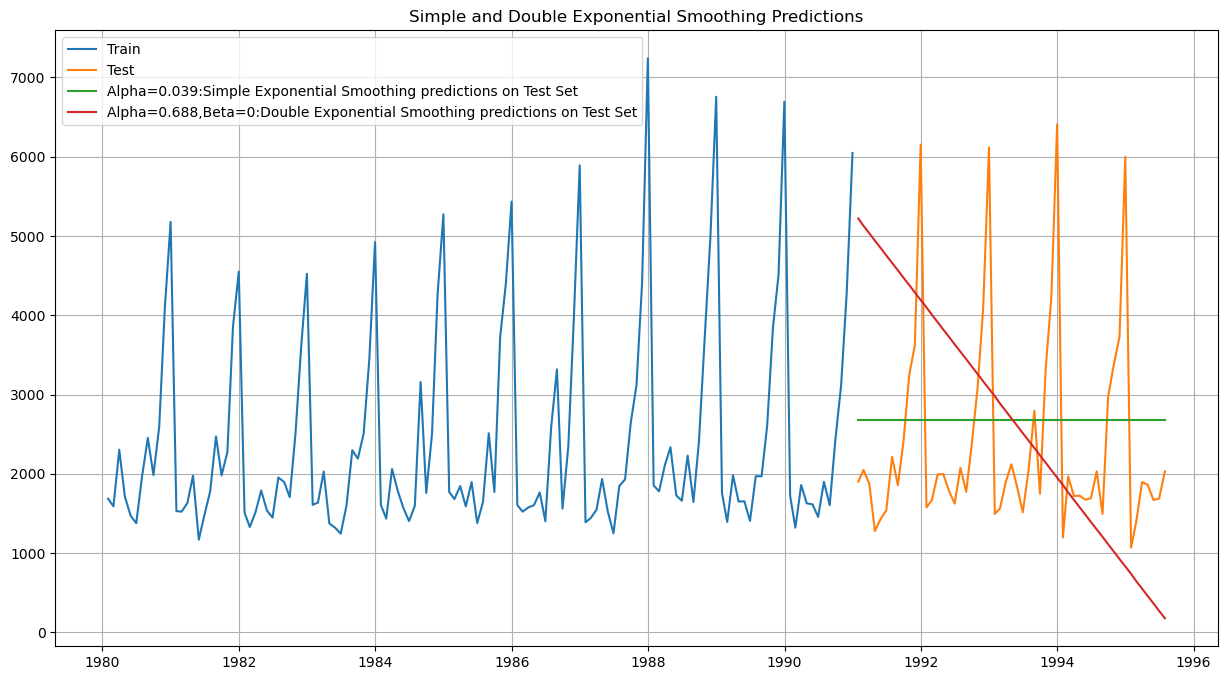

In [645]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.039:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.688,Beta=0:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [646]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 2007.238525758568


In [647]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.688,Beta=0:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
RegressionOnTime                        1389.135175
NaiveModel                              3864.279352
SimpleAverageModel                      1275.081804
2pointTrailingMovingAverage              813.400684
4pointTrailingMovingAverage             1156.589694
6pointTrailingMovingAverage             1283.927428
9pointTrailingMovingAverage             1346.278315
Alpha=0.039,SimpleExponentialSmoothing  1304.927405
Alpha=0.688,Beta=0:DES                  2007.238526

#### 5.3 Triple Exponential Smoothing (Holt - Winter's linear method with additive errors) ETS(A, A, A)  
Three parameters  𝛼 ,  𝛽  and  𝛾  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [648]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('Holt Winters model Exponential Smoothing Estimated Parameters:')
print('')
print(model_TES.params)

C:\Users\prapthi.pandian\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



Holt Winters model Exponential Smoothing Estimated Parameters:

{'smoothing_level': 0.11127227248079453, 'smoothing_trend': 0.012360804305088534, 'smoothing_seasonal': 0.46071766688111543, 'damping_trend': nan, 'initial_level': 2356.577980956387, 'initial_trend': -0.10243675533021725, 'initial_seasons': array([-636.23319334, -722.9832009 , -398.64410813, -473.43045416,
       -808.42473284, -815.34991402, -384.23065038,   72.99484403,
       -237.44226045,  272.32608272, 1541.37737052, 2590.07692296]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [649]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-31    1490.402890
1991-02-28    1204.525152
1991-03-31    1688.734182
1991-04-30    1551.226125
1991-05-31    1461.197883
1991-06-30    1278.646707
1991-07-31    1804.885616
1991-08-31    1678.955032
1991-09-30    2315.373126
1991-10-31    3224.976222
1991-11-30    4299.301434
1991-12-31    6410.712237
1992-01-31    1482.829908
1992-02-29    1196.952170
1992-03-31    1681.161200
1992-04-30    1543.653143
1992-05-31    1453.624901
1992-06-30    1271.073725
1992-07-31    1797.312634
1992-08-31    1671.382050
1992-09-30    2307.800144
1992-10-31    3217.403240
1992-11-30    4291.728452
1992-12-31    6403.139255
1993-01-31    1475.256926
1993-02-28    1189.379188
1993-03-31    1673.588218
1993-04-30    1536.080160
1993-05-31    1446.051919
1993-06-30    1263.500743
1993-07-31    1789.739652
1993-08-31    1663.809068
1993-09-30    2300.227162
1993-10-31    3209.830258
1993-11-30    4284.155470
1993-12-31    6395.566273
1994-01-31    1467.683944
1994-02-28    1181.806206
1994-03-31  

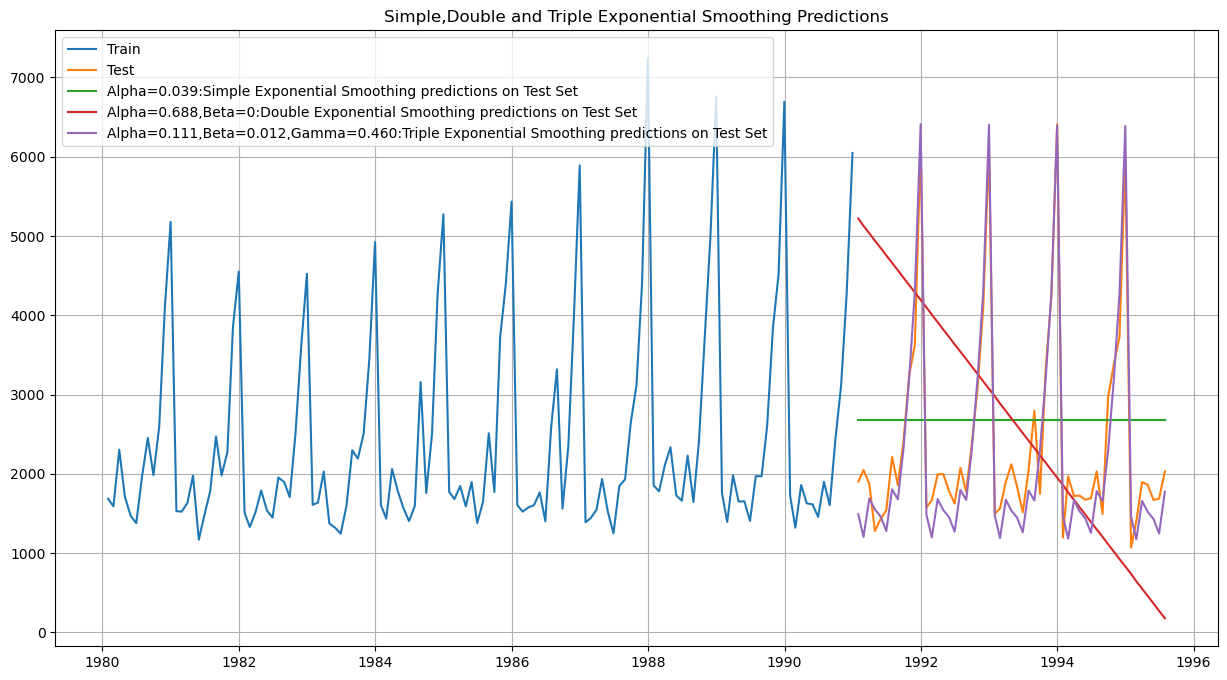

In [650]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.039:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.688,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.111,Beta=0.012,Gamma=0.460:Triple Exponential Smoothing predictions on Test Set')
        
plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [651]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 378.95102286703


In [652]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.111,Beta=0.012,Gamma=0.46:TES Additive'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
RegressionOnTime                                1389.135175
NaiveModel                                      3864.279352
SimpleAverageModel                              1275.081804
2pointTrailingMovingAverage                      813.400684
4pointTrailingMovingAverage                     1156.589694
6pointTrailingMovingAverage                     1283.927428
9pointTrailingMovingAverage                     1346.278315
Alpha=0.039,SimpleExponentialSmoothing          1304.927405
Alpha=0.688,Beta=0:DES                          2007.238526
Alpha=0.111,Beta=0.012,Gamma=0.46:TES Additive   378.951023

#### 5.4 Holt-Winters - ETS(A, A, M) - Holt Winter's linear method with multiplicative seasonality

In [653]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('Holt Winters model Exponential Smoothing Estimated Parameters:')
print('')
print(model_TES_am.params)

C:\Users\prapthi.pandian\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



Holt Winters model Exponential Smoothing Estimated Parameters:

{'smoothing_level': 0.11133818361298699, 'smoothing_trend': 0.049505131019509915, 'smoothing_seasonal': 0.3620795793580111, 'damping_trend': nan, 'initial_level': 2356.4967888704355, 'initial_trend': -10.187944726007238, 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
       0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
       1.87340336, 2.37811768]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [654]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-31    1587.497468
1991-02-28    1356.394925
1991-03-31    1762.929755
1991-04-30    1656.165933
1991-05-31    1542.002730
1991-06-30    1355.102435
1991-07-31    1854.197719
1991-08-31    1820.513188
1991-09-30    2276.971718
1991-10-31    3122.024202
1991-11-30    4128.528561
1991-12-31    5890.064588
1992-01-31    1538.233708
1992-02-29    1314.193684
1992-03-31    1707.937498
1992-04-30    1604.369388
1992-05-31    1493.650618
1992-06-30    1312.499576
1992-07-31    1795.750753
1992-08-31    1762.976871
1992-09-30    2204.819253
1992-10-31    3022.831861
1992-11-30    3997.009544
1992-12-31    5701.930382
1993-01-31    1488.969948
1993-02-28    1271.992443
1993-03-31    1652.945240
1993-04-30    1552.572843
1993-05-31    1445.298507
1993-06-30    1269.896716
1993-07-31    1737.303788
1993-08-31    1705.440555
1993-09-30    2132.666788
1993-10-31    2923.639519
1993-11-30    3865.490526
1993-12-31    5513.796176
1994-01-31    1439.706189
1994-02-28    1229.791202
1994-03-31  

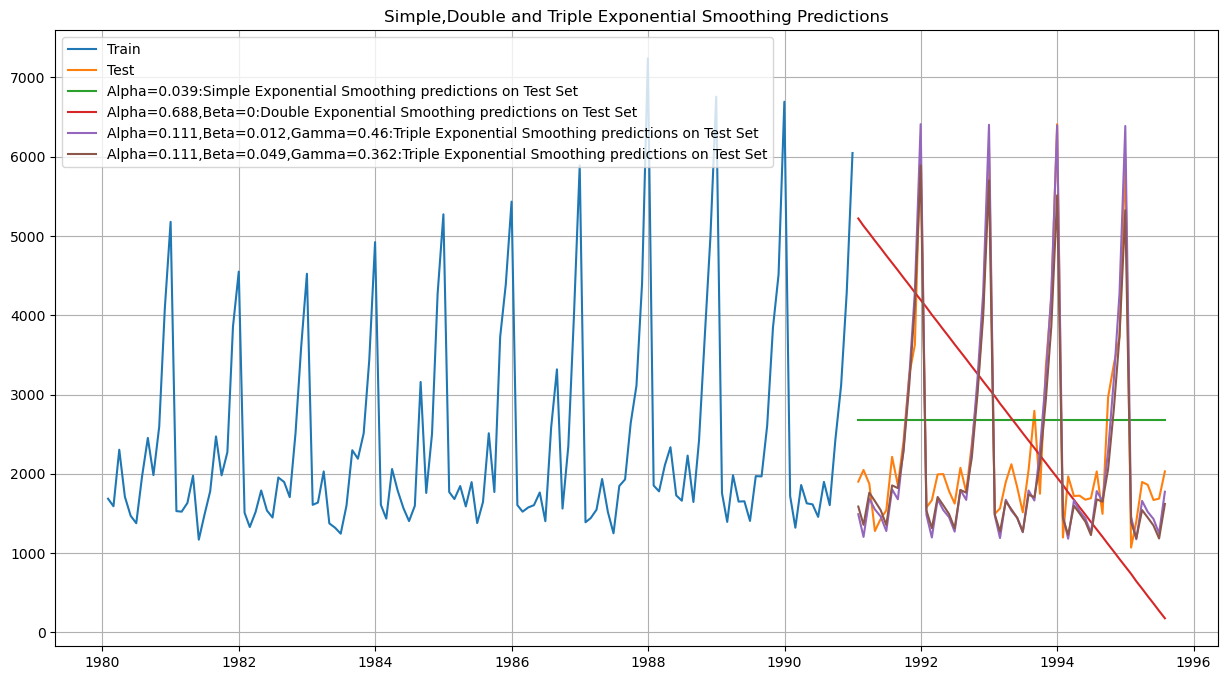

In [655]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.039:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.688,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.111,Beta=0.012,Gamma=0.46:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.111,Beta=0.049,Gamma=0.362:Triple Exponential Smoothing predictions on Test Set')
        
plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

#### Report model accuracy

In [656]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 404.286809456071


In [657]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.111,Beta=0.049,Gamma=0.362:TES Multiplicative'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.039,SimpleExponentialSmoothing              1304.927405
Alpha=0.688,Beta=0:DES                              2007.238526
Alpha=0.111,Beta=0.012,Gamma=0.46:TES Additive       378.951023
Alpha=0.111,Beta=0.049,Gamma=0.362:TES Multipli...   404.286809

## 2.5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.


### Check for stationarity of the whole Time Series data.

In [658]:
from statsmodels.tsa.stattools import adfuller

In [659]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

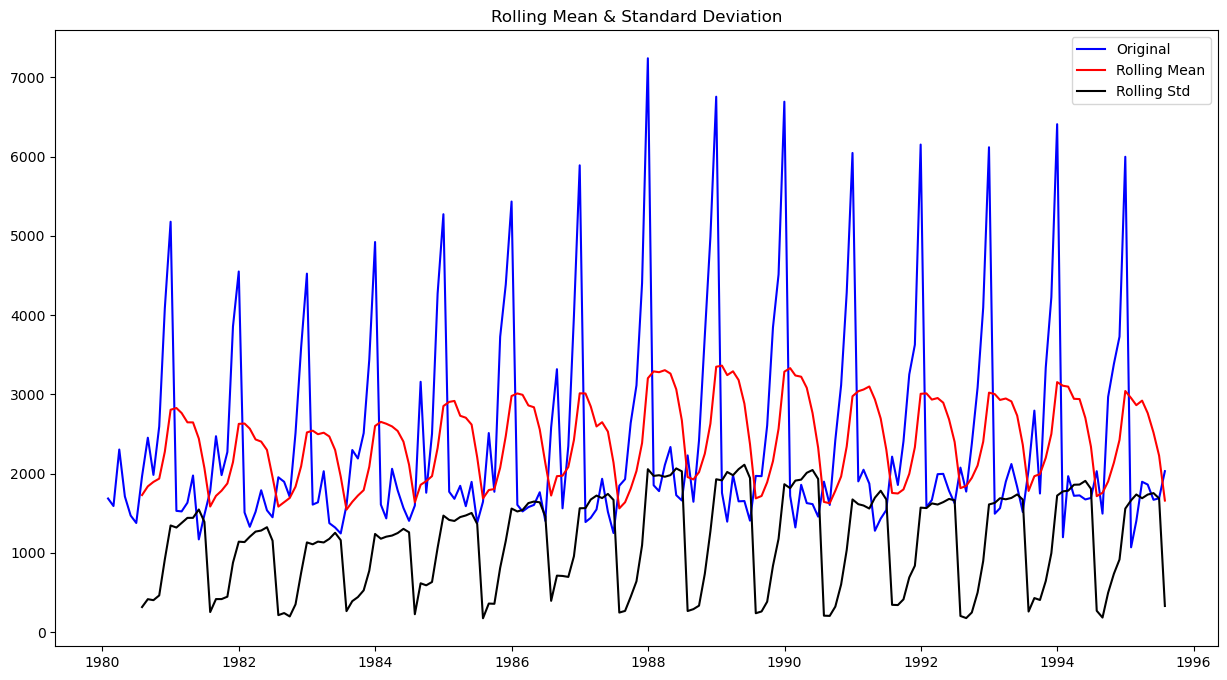

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [660]:
test_stationarity(df['Sparkling'])

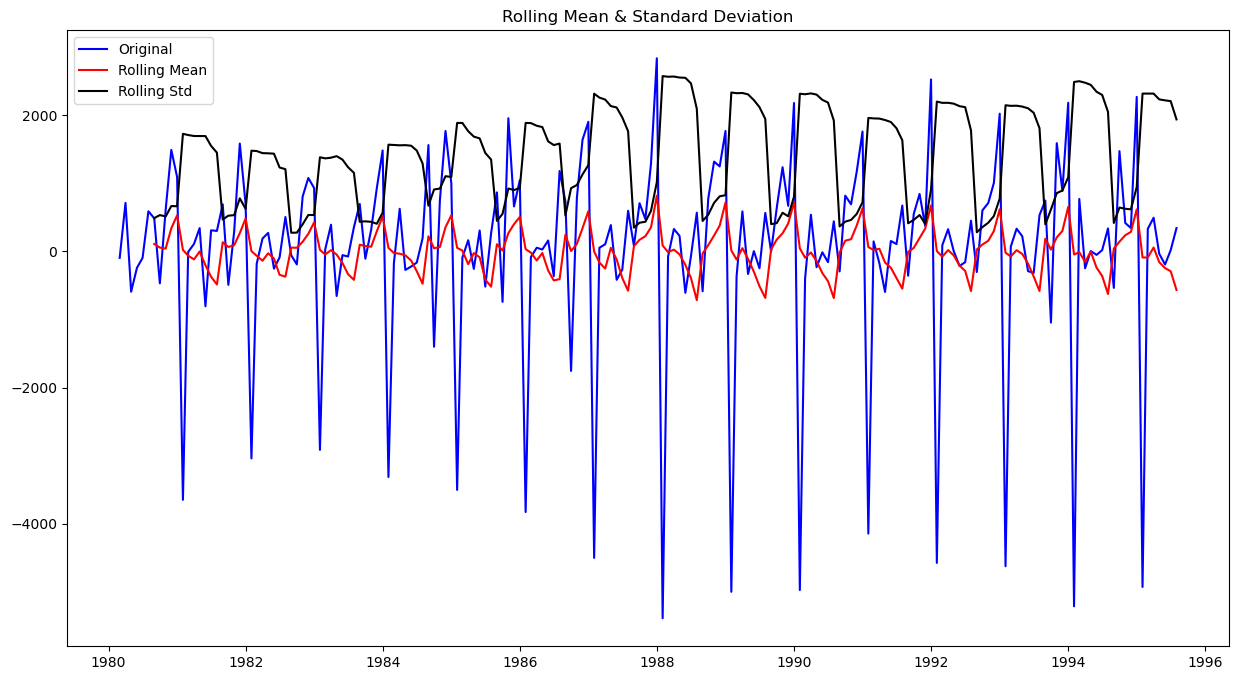

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [661]:
test_stationarity(df['Sparkling'].diff().dropna())

#### Plot the Autocorrelation function plots on the whole data.

In [662]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

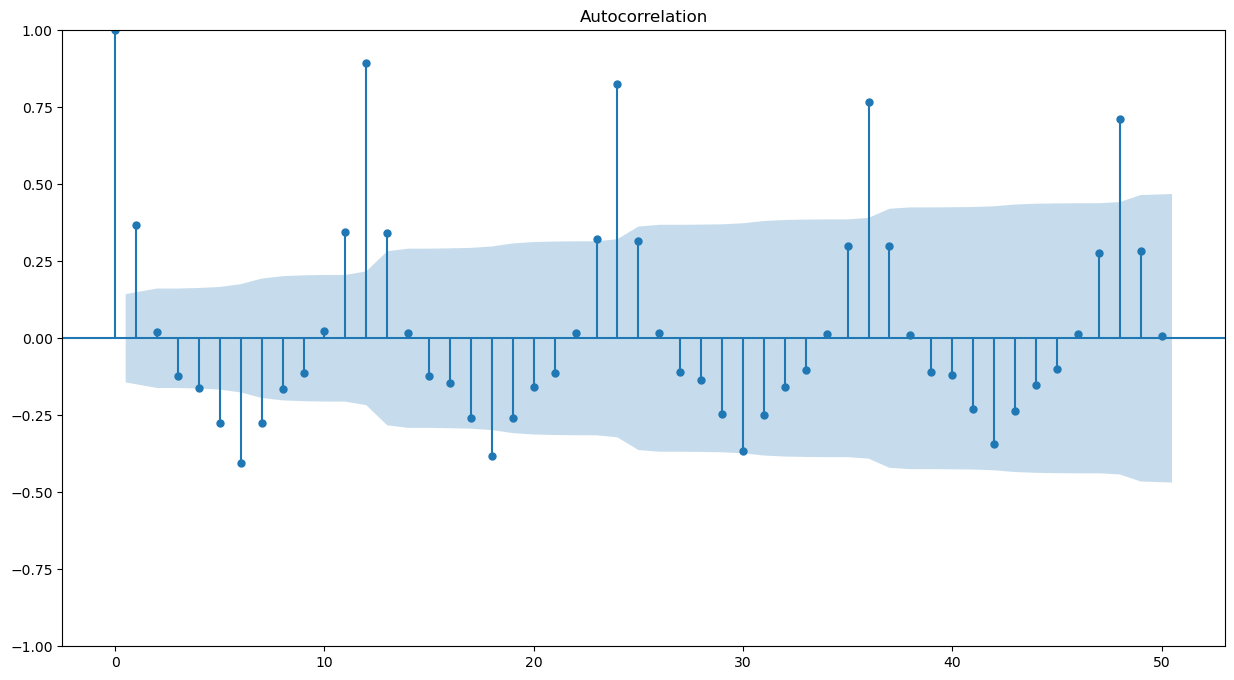

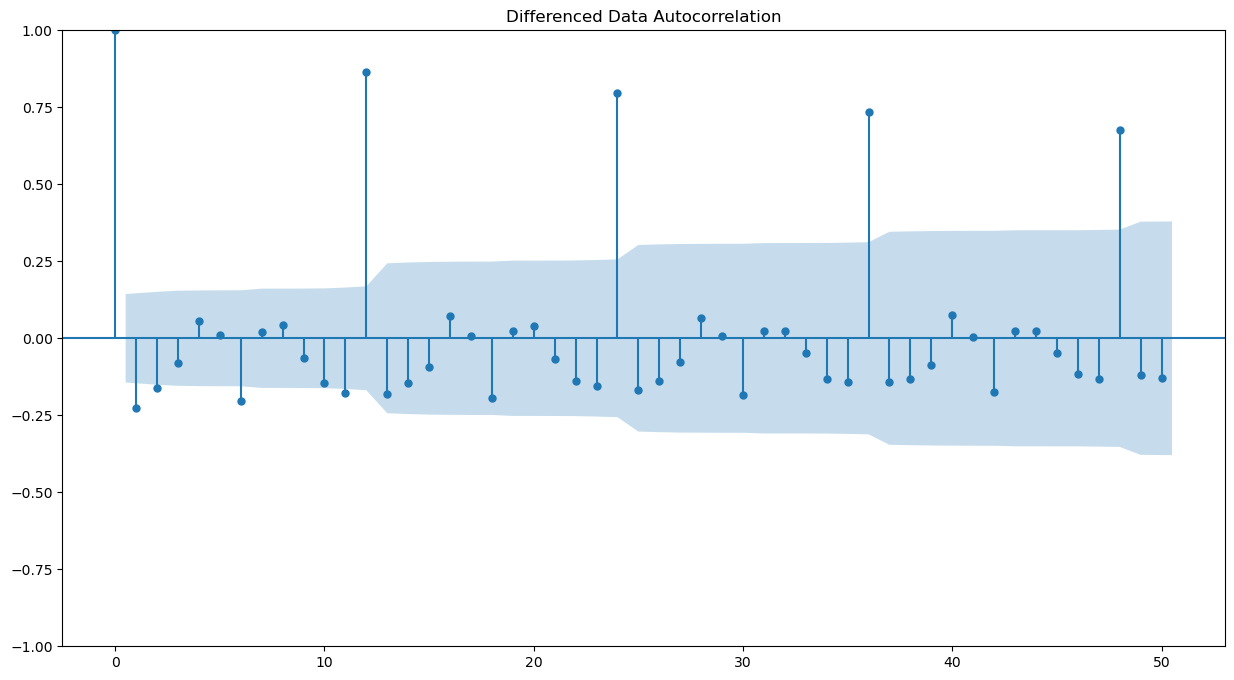

In [663]:
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

### Check for stationarity of the Training Data Time Series.

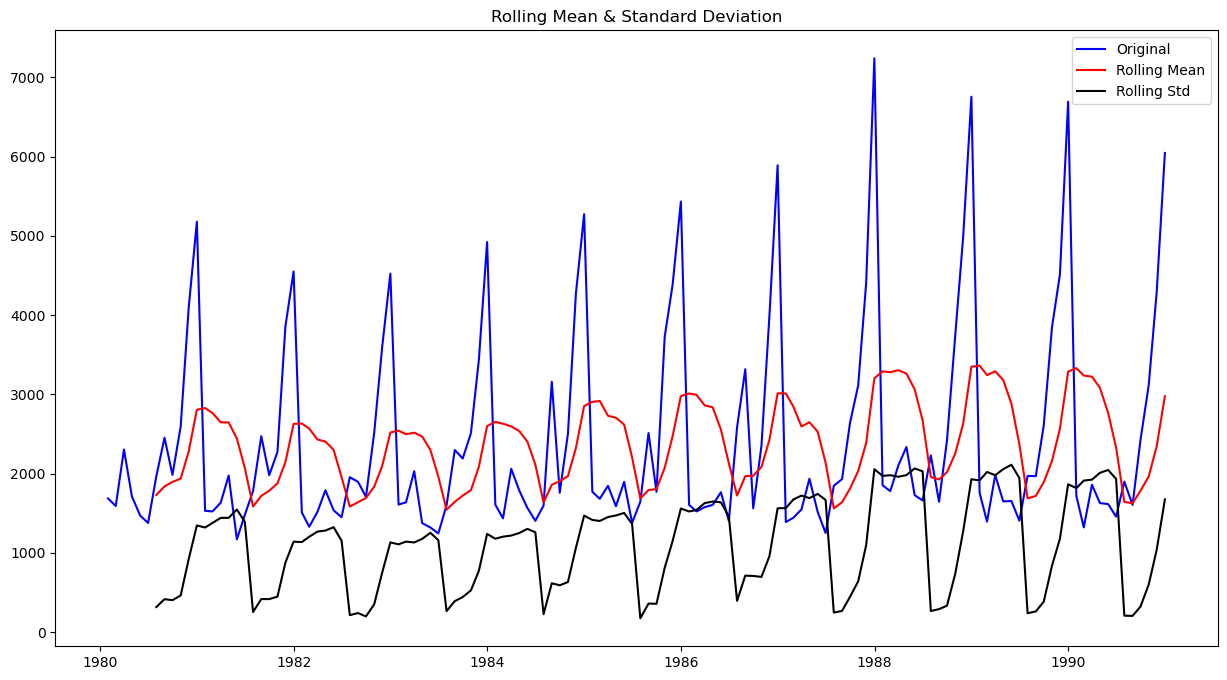

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [664]:
test_stationarity(train['Sparkling'])

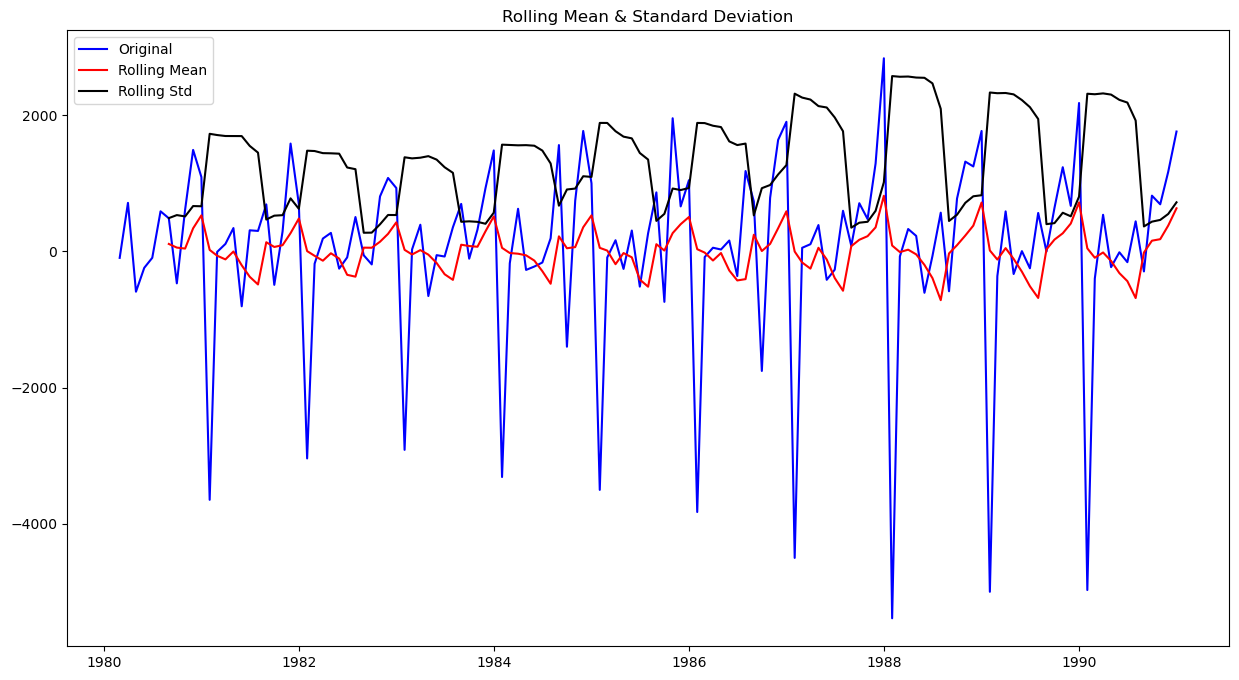

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [665]:
test_stationarity(train['Sparkling'].diff().dropna())

## 2.6.	Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### 2.6.1 ARIMA Model building to estimate best 'p' , 'd' , 'q' paramters ( Lowest AIC Approach )

In [666]:
import itertools
from statsmodels.tsa.arima.model import ARIMA

p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [667]:
results_list = []

In [668]:
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    results_list.append({'param':param, 'AIC': ARIMA_model.aic})


ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323132153
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673378


C:\Users\prapthi.pandian\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 2) - AIC:2234.527200451783
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.7776263084434
ARIMA(2, 1, 2) - AIC:2213.5092125299816


In [669]:
ARIMA_AIC = pd.DataFrame(results_list)
print(ARIMA_AIC)

       param          AIC
0  (0, 1, 0)  2267.663036
1  (0, 1, 1)  2263.060016
2  (0, 1, 2)  2234.408323
3  (1, 1, 0)  2266.608539
4  (1, 1, 1)  2235.755095
5  (1, 1, 2)  2234.527200
6  (2, 1, 0)  2260.365744
7  (2, 1, 1)  2233.777626
8  (2, 1, 2)  2213.509213


In [670]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2213.509213
7  (2, 1, 1)  2233.777626
2  (0, 1, 2)  2234.408323
5  (1, 1, 2)  2234.527200
4  (1, 1, 1)  2235.755095
6  (2, 1, 0)  2260.365744
1  (0, 1, 1)  2263.060016
3  (1, 1, 0)  2266.608539
0  (0, 1, 0)  2267.663036

In [671]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2), freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\prapthi.pandian\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 28 Jan 2024   AIC                           2213.509
Time:                        16:22:17   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216      0.0

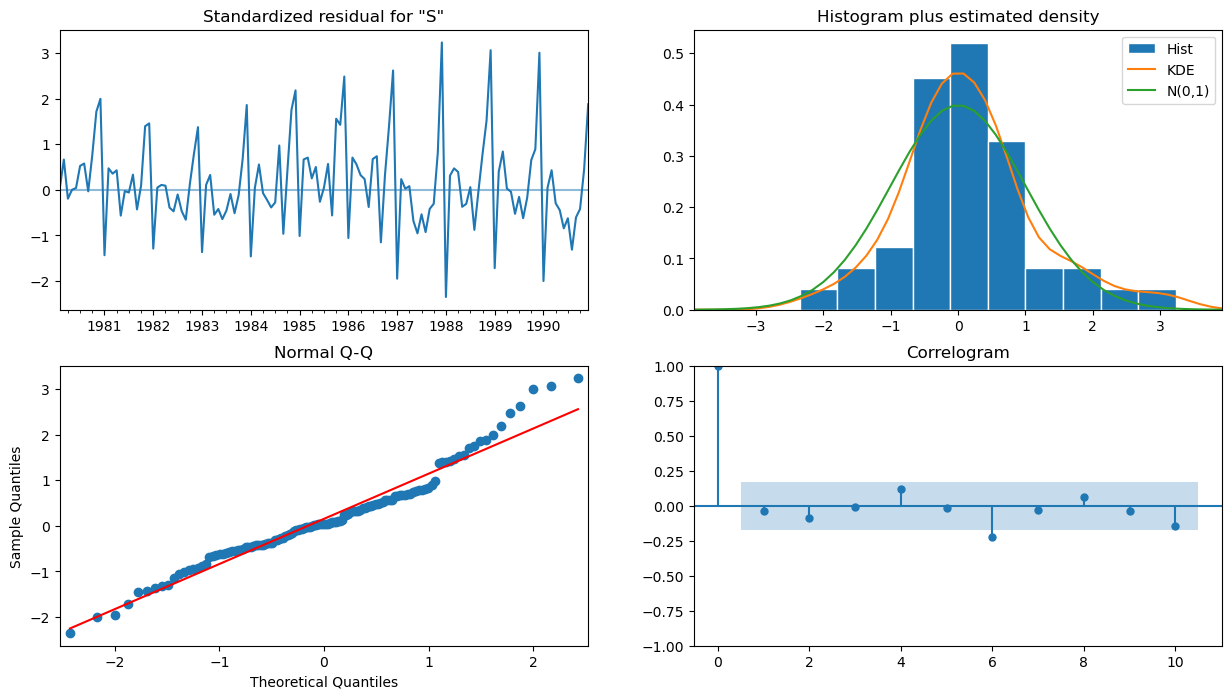

In [672]:
results_auto_ARIMA.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [673]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [674]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1299.9797563580828


In [675]:
temp_resultsDf0 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf0])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.039,SimpleExponentialSmoothing              1304.927405
Alpha=0.688,Beta=0:DES                              2007.238526
Alpha=0.111,Beta=0.012,Gamma=0.46:TES Additive       378.951023
Alpha=0.111,Beta=0.049,Gamma=0.362:TES Multipli...   404.286809
ARIMA(2,1,2)                                        1299.979756

### 2.6.2 SARIMA Model 

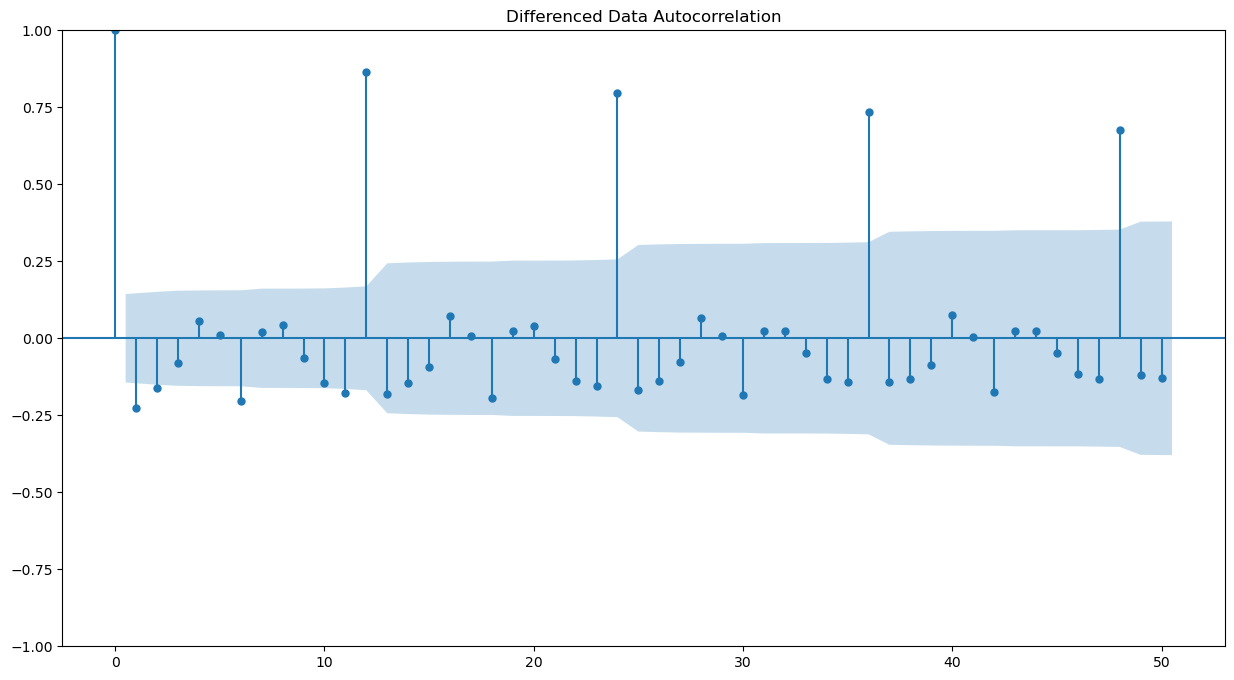

In [676]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. But from the decompostion at the start we ascertained that visually it looks like the seasonality =6 and thus using the same 

#### Setting the seasonality as 6  to estimate parameters using auto SARIMA model.

In [677]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [678]:
results_list1 = []

In [679]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        results_list1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic})

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716293
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536890155
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844433173
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360111456722
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267


C:\Users\prapthi.pandian\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.199361751048
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.917780565733
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850585
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082843
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339543055
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.5732428784568
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298134596
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.709327304231
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885103843348
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933566923
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.7036706984
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2187.4410101687126
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:2087.6843840215984
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1886.1151460108676
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:2129.7395689233854
SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1988.4111271457666
SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1839.6963212789651
SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1791.6537079050067
SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:

In [680]:
SARIMA_AIC = pd.DataFrame(results_list1)
print(SARIMA_AIC)

        param      seasonal          AIC
0   (0, 1, 0)  (0, 0, 0, 6)  2251.359720
1   (0, 1, 0)  (0, 0, 1, 6)  2152.378076
2   (0, 1, 0)  (0, 0, 2, 6)  1955.635554
3   (0, 1, 0)  (1, 0, 0, 6)  2164.409758
4   (0, 1, 0)  (1, 0, 1, 6)  2079.559984
..        ...           ...          ...
76  (2, 1, 2)  (1, 0, 1, 6)  1955.605895
77  (2, 1, 2)  (1, 0, 2, 6)  1825.895689
78  (2, 1, 2)  (2, 0, 0, 6)  1763.293101
79  (2, 1, 2)  (2, 0, 1, 6)  1765.216566
80  (2, 1, 2)  (2, 0, 2, 6)  1729.363550

[81 rows x 3 columns]


In [681]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1727.670866
26  (0, 1, 2)  (2, 0, 2, 6)  1727.888805
80  (2, 1, 2)  (2, 0, 2, 6)  1729.363550
17  (0, 1, 1)  (2, 0, 2, 6)  1741.703671
44  (1, 1, 1)  (2, 0, 2, 6)  1743.379778

In [682]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.835
Date:                           Sun, 28 Jan 2024   AIC                           1727.671
Time:                                   16:23:27   BIC                           1749.700
Sample:                                        0   HQIC                          1736.613
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6451      0.286     -2.256      0.024      -1.206      -0.085
ma.L1         -0.3355      0.227     -1.475

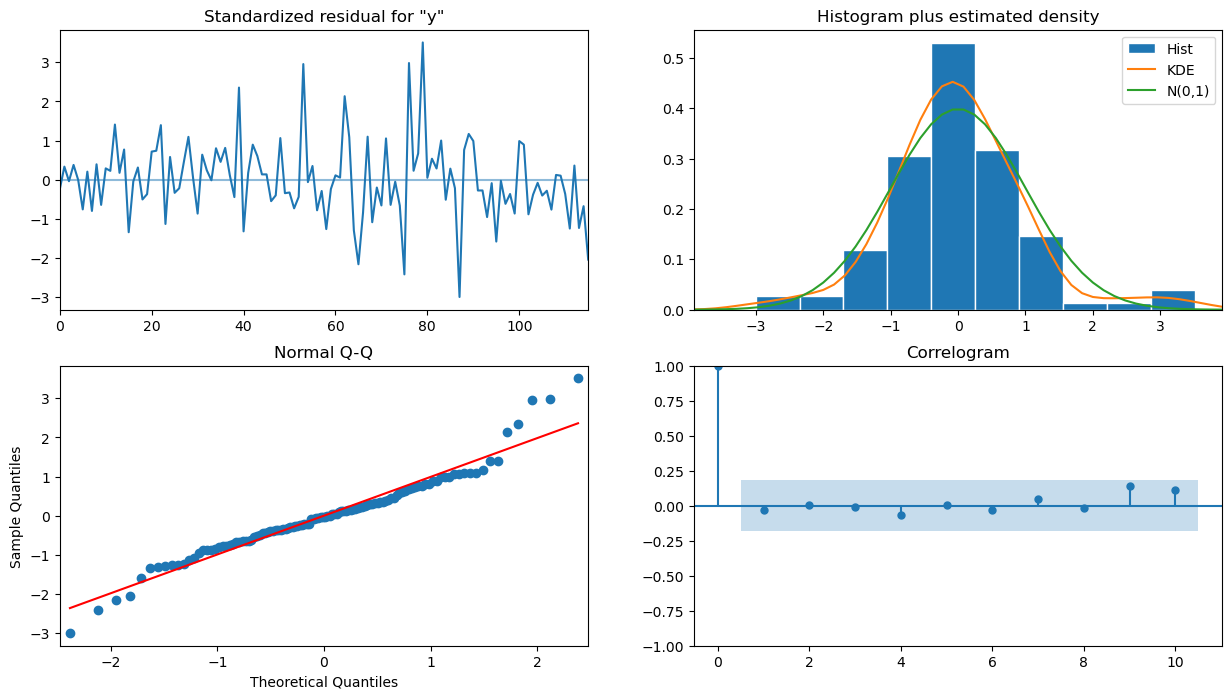

In [683]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [684]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [685]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1330.304021  380.553546     584.432776    2076.175265
1  1177.201978  392.106015     408.688311    1945.715645
2  1625.828724  392.300967     856.932957    2394.724491
3  1546.293507  397.705597     766.804859    2325.782154
4  1308.594051  398.926118     526.713226    2090.474875

In [686]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

626.992402111805


In [687]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.039,SimpleExponentialSmoothing              1304.927405
Alpha=0.688,Beta=0:DES                              2007.238526
Alpha=0.111,Beta=0.012,Gamma=0.46:TES Additive       378.951023
Alpha=0.111,Beta=0.049,Gamma=0.362:TES Multipli...   404.286809
ARIMA(2,1,2)                                        1299.979756
SARIMA(1,1,2)(2,0,2,6)                               626.992402

## 2.7.	Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [688]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.111,Beta=0.012,Gamma=0.46:TES Additive       378.951023
Alpha=0.111,Beta=0.049,Gamma=0.362:TES Multipli...   404.286809
SARIMA(1,1,2)(2,0,2,6)                               626.992402
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
SimpleAverageModel                                  1275.081804
6pointTrailingMovingAverage                         1283.927428
ARIMA(2,1,2)                                        1299.979756
Alpha=0.039,SimpleExponentialSmoothing              1304.927405
9pointTrailingMovingAverage                         1346.278315
RegressionOnTime                                    1389.135175
Alpha=0.688,Beta=0:DES                              2007.238526
NaiveModel                                          3864.279352

## 2.8.	Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [689]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.111,
                                                                 smoothing_trend=0.012,
                                                                 smoothing_seasonal=0.46)

C:\Users\prapthi.pandian\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [690]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 368.1199705679527


In [691]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=12)

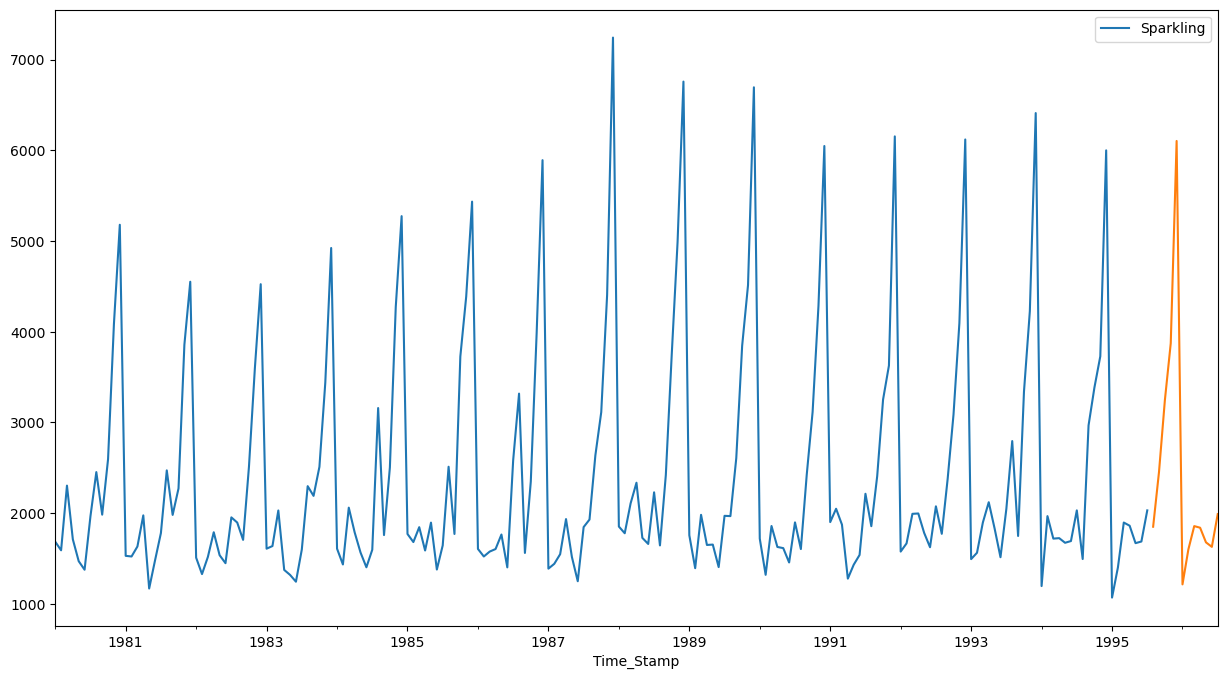

In [692]:
df.plot()
prediction_1.plot();

One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [693]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-31  1127.564038  1851.014405  2574.464772
1995-09-30  1731.765860  2455.216227  3178.666594
1995-10-31  2522.446436  3245.896803  3969.347170
1995-11-30  3150.038433  3873.488800  4596.939167
1995-12-31  5379.092987  6102.543354  6825.993721

In [696]:
pred_1_df.to_csv('Forecasted Values_Sparkling.csv')

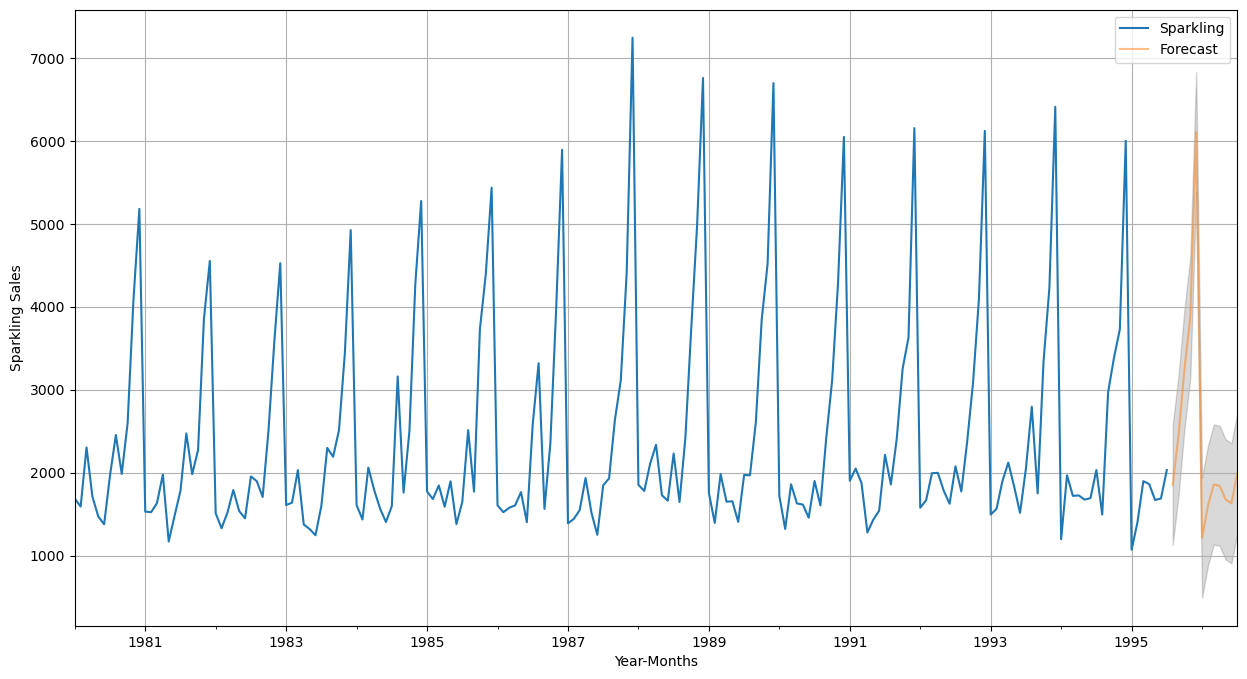

In [697]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling Sales')
plt.legend(loc='best')
plt.grid()
plt.show()